<a href="https://colab.research.google.com/github/eserolo/Pruebas_estandarizadas/blob/main/Analitica_de_resultados_PG_vr_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Minuto de Dios

**Facultad de Ingenieria**

**Programa de Ingenieria de Sistemas**

**Especializacion en IA ciencia y analitica de datos**

**Proyecto de grado: Analitica implementacion pruebas psicometricas**

***Estudiantes: Lic. Diego Alejandro Diaz Malagon, Ing. Sebastian Diaz Malagon y Ing. Edison Salinas Camacho***



> **Fase 1: Analisis exploratorio**

*En esta fase se realizara un analisis exploratorio de los datos para comenzar a identificar patrones y la informacion de mayor relevancia en la realizacion de pruebas psicometricas en un conjunto de empleados que estudian para pruebas de concurso de meritos en la CNSC para optar por una cargo de carrera administrativa. La idea principal es implementar un modelo de aprendizaje supervisado que nos permita trabajar un dataset de datos y aplicar e implementar lo aprendido en el transcurso de la especializacion*

In [118]:
# Declaracion de librerias que van hacer utilizadas en la ejecucion del notebook
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import panel as pn
import plotly.graph_objects as go
import ipywidgets as widgets
from sklearn.impute import SimpleImputer
from string import ascii_letters
import statsmodels.api as sm
import pylab as py
from matplotlib import style
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from ipywidgets import interactive

**1.1 Importación de los datos**

In [119]:
# Cargue inicial de archivos al notebook
load=files.upload()

Saving Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2.xlsx to Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 (2).xlsx


**Instanciacion de cada uno de los datasets que van a ser analizados y trabajados en el notebook**

In [120]:
ejeCafetero_compEsp = pd.read_excel('Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2.xlsx', sheet_name='compEsp', engine='openpyxl')
ejeCafetero_compByF = pd.read_excel('Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2.xlsx', sheet_name='compByF', engine='openpyxl')
ejeCafetero_datos = pd.read_excel('Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2.xlsx', sheet_name='DATOS', engine='openpyxl')
ejeCafetero_compCompt = pd.read_excel('Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2.xlsx', sheet_name='compCompt', engine='openpyxl')

In [121]:
# Numero de filas pestaña Competencias Especificas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2
print('Num. filas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Especificas: ',len(ejeCafetero_compEsp.index))

# Numero de columnas
print('Num. columnas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Especificas: ',len(ejeCafetero_compEsp.columns))

print('\n')

# Numero de filas pestaña Competencias Basicas y Funcionales archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2
print('Num. filas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Basicas y Funcionales: ',len(ejeCafetero_compByF.index))

# Numero de columnas
print('Num. columnas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Basicas y Funcionales: ',len(ejeCafetero_compByF.columns))

print('\n')

# Numero de filas pestaña Competencias Comportamentales archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2
print('Num. filas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Comportamentales: ',len(ejeCafetero_compCompt.index))

# Numero de columnas
print('Num. columnas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Comportamentales: ',len(ejeCafetero_compCompt.columns))

Num. filas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Especificas:  150
Num. columnas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Especificas:  4


Num. filas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Basicas y Funcionales:  107
Num. columnas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Basicas y Funcionales:  135


Num. filas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Comportamentales:  107
Num. columnas archivo Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 pestaña Competencias Comportamentales:  80


**1.2 Limpieza y preparación de los datos**

 El proceso de limpieza y preparación de datos en un conjunto de datos para un modelo supervisado de aprendizaje de máquina implica una serie de pasos interrelacionados que buscan optimizar la calidad y la relevancia de los datos antes de aplicar algoritmos de machine learning.

En nuestro caso, nos podemos encontrar con datasets donde todas las columnas son correctas como es el caso de:

In [122]:
ejeCafetero_compEsp.dtypes

Dimensión              object
Competencia            object
N° \npregunta           int64
Respuesta correcta     object
dtype: object

In [123]:
ejeCafetero_compByF.dtypes

Numero                             int64
Nombres completos                 object
Quiz Name                         object
Documento                          int64
Cargo                             object
                                  ...   
RC5_CE                             int64
RI5_CE                             int64
Total_RespuestasCE                 int64
Total_CompetenciasEspecificas    float64
TOTAL_PRUEBA_ByF                 float64
Length: 135, dtype: object

In [124]:
ejeCafetero_compCompt.dtypes

Numero                           int64
Nombres completos               object
Quiz Name                       object
Documento                        int64
Cargo                           object
                                ...   
RC4_R                            int64
RI4_R                            int64
Total_RespuestasR                int64
Total_Responsabilidad          float64
TOTAL_PRUEBA_COMPORTAMENTAL    float64
Length: 80, dtype: object

**Comprobamos que no hay valores NaN. El primer sum() suma todos los valores de una columna y el segundo suma todas las columnas entre si.**

In [125]:
def hasNA():
    print('Dataframe reporte Eje Cafetero pestaña Competencias Especificas(compEsp): ',ejeCafetero_compEsp.isna().astype(int).sum().sum())
    print('Dataframe reporte Eje Cafetero pestaña Competencias Basicas y Funcionales (compByF): ',ejeCafetero_compByF.isna().astype(int).sum().sum())
    print('Dataframe reporte Eje Cafetero pestaña Competencias Comportamentales(compCompt): ',ejeCafetero_compCompt.isna().astype(int).sum().sum())
hasNA()

Dataframe reporte Eje Cafetero pestaña Competencias Especificas(compEsp):  0
Dataframe reporte Eje Cafetero pestaña Competencias Basicas y Funcionales (compByF):  0
Dataframe reporte Eje Cafetero pestaña Competencias Comportamentales(compCompt):  0


**Search o búsqueda de datos en blanco, datos missing y comienzo de datacleaning del dataset reporte eje cafetero, componente competencias Basicas y Funcionales**

In [126]:
ejeCafetero_compByF.isnull().sum()

Numero                           0
Nombres completos                0
Quiz Name                        0
Documento                        0
Cargo                            0
                                ..
RC5_CE                           0
RI5_CE                           0
Total_RespuestasCE               0
Total_CompetenciasEspecificas    0
TOTAL_PRUEBA_ByF                 0
Length: 135, dtype: int64

**Search o búsqueda de datos en blanco, datos missing y comienzo de datacleaning del dataset reporte eje cafetero, componente competencias comportamentales**

In [127]:
ejeCafetero_compCompt.isnull().sum()

Numero                         0
Nombres completos              0
Quiz Name                      0
Documento                      0
Cargo                          0
                              ..
RC4_R                          0
RI4_R                          0
Total_RespuestasR              0
Total_Responsabilidad          0
TOTAL_PRUEBA_COMPORTAMENTAL    0
Length: 80, dtype: int64

**Tratamiento de los datos missing en dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2, hoja de calculo ejeCafetero_compByF componente competencias Basicas y Funcionales, aplicando el metodo .getcwd() me permite traer el dataset en forma de cadena de valores para determinar cuantos datos se encuentran vacios o nulos.**

In [128]:
import os
import missingno as msno
os.getcwd()
ejeCafetero_compByF.isnull()

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Componente_1,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Tratamiento de los datos missing en dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2, hoja de calculo ejeCafetero_compByF componente competencias comportamentales, aplicando el metodo .getcwd() me permite traer el dataset en forma de cadena de valores para determinar cuantos datos se encuentran vacios o nulos.**

In [129]:
import os
import missingno as msno
os.getcwd()
ejeCafetero_compCompt.isnull()

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Competencia_1,...,Q46,Q47,Q48,Q49,Q50,RC4_R,RI4_R,Total_RespuestasR,Total_Responsabilidad,TOTAL_PRUEBA_COMPORTAMENTAL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Tratamiento de los datos missing del Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2, hoja de calculo ejeCafetero_compByF, componente competencias Basicas y Funcionales. Me trae informacion detallada del tipo de datos contenidos en el dataset y con el metodo verbose realizo una descripcion detallada de los mismos. Con el metodo nulls_counts realizo un recuento de datos nulos.**


In [130]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
ejeCafetero_compByF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 135 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    Numero                             int64  
 1    Nombres completos                  object 
 2    Quiz Name                          object 
 3    Documento                          int64  
 4    Cargo                              object 
 5    Zona_Examen                        object 
 6    Num Questions                      int64  
 7    Num Correct                        int64  
 8    Percent Correct                    int64  
 9    Componente_1                       object 
 10   Q1                                 int64  
 11   Q2                                 int64  
 12   Q3                                 int64  
 13   Q4                                 int64  
 14   Q5                                 int64  
 15   Q6                                 int64  
 16   Q7    

**Tratamiento de los datos missing del Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2, hoja de calculo ejeCafetero_compCompt componente competencias comportamentales. Me trae informacion detallada del tippo de datos contenidos en el dataset y con el metodo verbose realizo una descripcion detallada de los mismos. Con el metodo nulls_counts realizo un recuento de datos nulos.**

In [131]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
ejeCafetero_compCompt.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Numero                           107 non-null    int64  
 1   Nombres completos                107 non-null    object 
 2   Quiz Name                        107 non-null    object 
 3   Documento                        107 non-null    int64  
 4   Cargo                            107 non-null    object 
 5   Zona_Examen                      107 non-null    object 
 6   Num Questions                    107 non-null    int64  
 7   Num Correct                      107 non-null    int64  
 8   Percent Correct                  107 non-null    int64  
 9   Competencia_1                    107 non-null    object 
 10  Q1                               107 non-null    int64  
 11  Q2                               107 non-null    int64  
 12  Q3                    

**Grafica de datos por medio de la libreria Seaborn utilizando el metodo .heatmap() o grafica de calor para determinar si se encuentra algún datos vacio o nulo (missing) en el Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2, hoja de calculo ejeCafetero_compByF componente de competencias Basicas y Funcionales**

<Axes: >

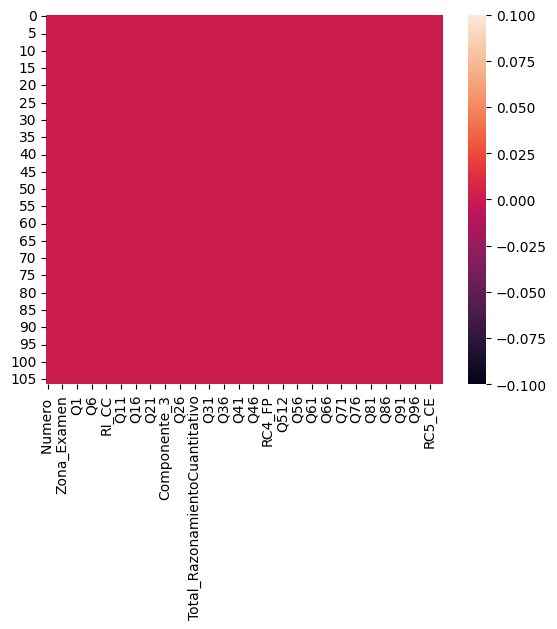

In [132]:
sb.heatmap(ejeCafetero_compByF.isnull(), cbar=True)

**Análisis de la grafica**

*Como se puede determinar en la grafica tipo heatmap() o grafica de calor el color rojo perteneciente a 0.000 es predominante en todo el dataset ejeCafetero_compByF evidenciando que no se encuentran valores nulos en la tabla de datos.*

**Grafica de datos por medio de la libreria Seaborn utilizando el metodo .heatmap() o grafica de calor para determinar si se encuentra algún datos vacio o nulo (missing) en el Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2, hoja de calculo ejeCafetero_compCompt, componente competencias comportamentales.**

<Axes: >

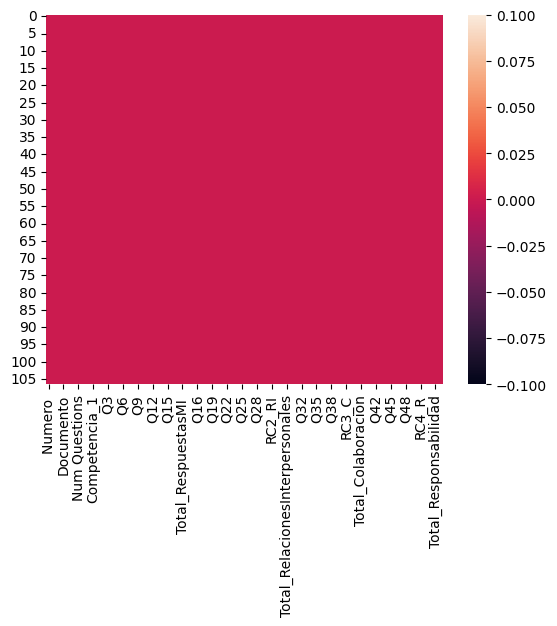

In [133]:
sb.heatmap(ejeCafetero_compCompt.isnull(), cbar=True)

**Análisis de la grafica**

*Como se puede determinar en la grafica tipo heatmap() o grafica de calor el color rojo perteneciente a 0.000 es predominante en todo el dataset ejeCafetero_compCompt evidenciando que no se encuentran valores nulos en la tabla de datos.*

**Verificacion de posibles datos duplicados**

Scripts para trabajar el cleaning o limpieza de datos e identificar columnas duplicadas con la libreria pandas y proceder a eliminarlas, tanto del dataset denominado ejeCafetero_compByF como del dataset ejeCafetero_compCompt.

In [134]:
duplicates = []
for col in range(ejeCafetero_compByF.shape[1]):
    contents = ejeCafetero_compByF.iloc[:, col]

    for comp in range(col + 1, ejeCafetero_compByF.shape[1]):
        if contents.equals(ejeCafetero_compByF.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
print('Posibles datos duplicados', duplicates)

Posibles datos duplicados [8]


Se encuentran este número de datos duplicados, pero al verificar el dataset estos corresponden a datos coincidentes en celdas que no pueden ser borrados para mantener la integridad de la informacíon.

In [135]:
duplicates = []
for col in range(ejeCafetero_compCompt.shape[1]):
    contents = ejeCafetero_compCompt.iloc[:, col]

    for comp in range(col + 1, ejeCafetero_compCompt.shape[1]):
        if contents.equals(ejeCafetero_compCompt.iloc[:, comp]):
            duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
print('Posibles datos duplicados', duplicates)

Posibles datos duplicados [47, 77]


Las columnas duplicadas tambien se pueden obtener por medio de listas por compresion de la hoja de calculo ejeCafetero_compByF componente de competencias Basicas y Funcionales.

In [136]:
duplicates = [b for a in range(ejeCafetero_compByF.shape[1]) for b in range(a + 1, ejeCafetero_compByF.shape[1])
if ejeCafetero_compByF.iloc[:, a].equals(ejeCafetero_compByF.iloc[:, b])]
ejeCafetero_compByF.drop(ejeCafetero_compByF.columns[duplicates], axis=1)

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Componente_1,Q1,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Básicas y Funcionales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,100,63,Competencias_Ciudadanas,1,...,0,1,1,1,0,35,15,50,0.70,0.572850
1,2,ALZATE VALENCIANORA MILBIA,Competencias Básicas y Funcionales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,100,62,Competencias_Ciudadanas,1,...,0,1,0,0,0,33,17,50,0.66,0.584657
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Básicas y Funcionales,10124627,CELADOR,Eje Cafetero,100,56,Competencias_Ciudadanas,1,...,0,0,1,1,1,34,16,50,0.68,0.445903
3,4,BERNAL VALENCIA GUSTAVO,Competencias Básicas y Funcionales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,100,41,Competencias_Ciudadanas,1,...,0,0,0,0,0,19,31,50,0.38,0.424068
4,5,BONILLA QUIROGA VICTORIANO,Competencias Básicas y Funcionales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,100,42,Competencias_Ciudadanas,1,...,0,0,0,0,1,16,34,50,0.32,0.443710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,SANDRA LILIANA DIAZ GALINDO,Competencias Básicas y Funcionales,35530905,AUX SERVICIOS GENERALES,Cundinamarca,100,44,Competencias_Ciudadanas,1,...,1,1,0,1,1,24,26,50,0.48,0.415565
103,104,SULY MILENA PEÑA,Competencias Básicas y Funcionales,20928360,AUX ADMINISTRATIVO,Cundinamarca,100,45,Competencias_Ciudadanas,1,...,0,0,0,0,0,22,28,50,0.44,0.414570
104,105,WILLIAM GERARDO ROMERO AMAYA,Competencias Básicas y Funcionales,348300,CELADOR,Cundinamarca,100,36,Competencias_Ciudadanas,1,...,1,1,0,0,1,18,32,50,0.36,0.385285
105,106,YOLANDA SABOGAL URREGO,Competencias Básicas y Funcionales,20886505,AUX ADMINISTRATIVO,Cundinamarca,100,42,Competencias_Ciudadanas,0,...,0,0,0,1,0,17,33,50,0.34,0.390464


Las columnas duplicadas tambien se pueden obtener por medio de listas por compresion de la hoja de calculo ejeCafetero_compCompt, componente de competencias comportamentales.

In [137]:
duplicates = [b for a in range(ejeCafetero_compCompt.shape[1]) for b in range(a + 1, ejeCafetero_compCompt.shape[1])
if ejeCafetero_compCompt.iloc[:, a].equals(ejeCafetero_compCompt.iloc[:, b])]
ejeCafetero_compCompt.drop(ejeCafetero_compCompt.columns[duplicates], axis=1)

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Competencia_1,...,Q45,Q46,Q47,Q48,Q49,Q50,RC4_R,RI4_R,Total_Responsabilidad,TOTAL_PRUEBA_COMPORTAMENTAL
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Comportamentales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,50,45,90,Manejo_Informacion,...,1,1,1,1,1,1,10,0,1.0,0.908333
1,2,ALZATE VALENCIANORA MILBIA,Competencias Comportamentales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,1,10,0,1.0,0.883333
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Comportamentales,10124627,CELADOR,Eje Cafetero,50,43,86,Manejo_Informacion,...,1,1,1,1,1,1,9,1,0.9,0.850000
3,4,BERNAL VALENCIA GUSTAVO,Competencias Comportamentales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,50,23,46,Manejo_Informacion,...,1,0,1,1,1,1,9,1,0.9,0.483333
4,5,BONILLA QUIROGA VICTORIANO,Competencias Comportamentales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,1,10,0,1.0,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,SANDRA LILIANA DIAZ GALINDO,Competencias Comportamentales,35530905,AUX SERVICIOS GENERALES,Cundinamarca,50,22,44,Manejo_Informacion,...,0,0,0,0,0,1,2,8,0.2,0.366667
103,104,SULY MILENA PEÑA,Competencias Comportamentales,20928360,AUX ADMINISTRATIVO,Cundinamarca,50,15,30,Manejo_Informacion,...,1,1,0,0,0,1,4,6,0.4,0.466667
104,105,WILLIAM GERARDO ROMERO AMAYA,Competencias Comportamentales,348300,CELADOR,Cundinamarca,50,15,30,Manejo_Informacion,...,1,0,1,0,0,0,3,7,0.3,0.408333
105,106,YOLANDA SABOGAL URREGO,Competencias Comportamentales,20886505,AUX ADMINISTRATIVO,Cundinamarca,50,44,88,Manejo_Informacion,...,1,1,1,1,1,1,9,1,0.9,0.875000


Visualizacion del dataset Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compByF componente de competencias Basicas y Funcionales, luego de realizar todo el trabajo de cleaning, duplicated y missing de datos.

In [138]:
ejeCafetero_compByF.drop(ejeCafetero_compByF.columns[duplicates], axis=1)

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Componente_1,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Básicas y Funcionales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,100,63,63,Competencias_Ciudadanas,...,0,1,1,1,0,35,15,50,0.70,0.572850
1,2,ALZATE VALENCIANORA MILBIA,Competencias Básicas y Funcionales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,100,62,62,Competencias_Ciudadanas,...,0,1,0,0,0,33,17,50,0.66,0.584657
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Básicas y Funcionales,10124627,CELADOR,Eje Cafetero,100,56,56,Competencias_Ciudadanas,...,0,0,1,1,1,34,16,50,0.68,0.445903
3,4,BERNAL VALENCIA GUSTAVO,Competencias Básicas y Funcionales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,100,41,41,Competencias_Ciudadanas,...,0,0,0,0,0,19,31,50,0.38,0.424068
4,5,BONILLA QUIROGA VICTORIANO,Competencias Básicas y Funcionales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,100,42,42,Competencias_Ciudadanas,...,0,0,0,0,1,16,34,50,0.32,0.443710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,SANDRA LILIANA DIAZ GALINDO,Competencias Básicas y Funcionales,35530905,AUX SERVICIOS GENERALES,Cundinamarca,100,44,44,Competencias_Ciudadanas,...,1,1,0,1,1,24,26,50,0.48,0.415565
103,104,SULY MILENA PEÑA,Competencias Básicas y Funcionales,20928360,AUX ADMINISTRATIVO,Cundinamarca,100,45,45,Competencias_Ciudadanas,...,0,0,0,0,0,22,28,50,0.44,0.414570
104,105,WILLIAM GERARDO ROMERO AMAYA,Competencias Básicas y Funcionales,348300,CELADOR,Cundinamarca,100,36,36,Competencias_Ciudadanas,...,1,1,0,0,1,18,32,50,0.36,0.385285
105,106,YOLANDA SABOGAL URREGO,Competencias Básicas y Funcionales,20886505,AUX ADMINISTRATIVO,Cundinamarca,100,42,42,Competencias_Ciudadanas,...,0,0,0,1,0,17,33,50,0.34,0.390464


Visualizacion del dataset Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compCompt componente de competencias comportamentales, luego de realizar todo el trabajo de cleaning, duplicated y missing de datos.

In [139]:
ejeCafetero_compCompt.drop(ejeCafetero_compCompt.columns[duplicates], axis=1)

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Competencia_1,...,Q45,Q46,Q47,Q48,Q49,Q50,RC4_R,RI4_R,Total_Responsabilidad,TOTAL_PRUEBA_COMPORTAMENTAL
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Comportamentales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,50,45,90,Manejo_Informacion,...,1,1,1,1,1,1,10,0,1.0,0.908333
1,2,ALZATE VALENCIANORA MILBIA,Competencias Comportamentales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,1,10,0,1.0,0.883333
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Comportamentales,10124627,CELADOR,Eje Cafetero,50,43,86,Manejo_Informacion,...,1,1,1,1,1,1,9,1,0.9,0.850000
3,4,BERNAL VALENCIA GUSTAVO,Competencias Comportamentales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,50,23,46,Manejo_Informacion,...,1,0,1,1,1,1,9,1,0.9,0.483333
4,5,BONILLA QUIROGA VICTORIANO,Competencias Comportamentales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,1,10,0,1.0,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,SANDRA LILIANA DIAZ GALINDO,Competencias Comportamentales,35530905,AUX SERVICIOS GENERALES,Cundinamarca,50,22,44,Manejo_Informacion,...,0,0,0,0,0,1,2,8,0.2,0.366667
103,104,SULY MILENA PEÑA,Competencias Comportamentales,20928360,AUX ADMINISTRATIVO,Cundinamarca,50,15,30,Manejo_Informacion,...,1,1,0,0,0,1,4,6,0.4,0.466667
104,105,WILLIAM GERARDO ROMERO AMAYA,Competencias Comportamentales,348300,CELADOR,Cundinamarca,50,15,30,Manejo_Informacion,...,1,0,1,0,0,0,3,7,0.3,0.408333
105,106,YOLANDA SABOGAL URREGO,Competencias Comportamentales,20886505,AUX ADMINISTRATIVO,Cundinamarca,50,44,88,Manejo_Informacion,...,1,1,1,1,1,1,9,1,0.9,0.875000


> **Verificacion de datos posterior al cleaning**

Informacion de cada tipo de datos en el dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compByF componente competencias Basicas y Funcionales, luego de realizar toda la implementacion de cleaning en el dataset.

In [140]:
ejeCafetero_compByF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 135 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    Numero                             int64  
 1    Nombres completos                  object 
 2    Quiz Name                          object 
 3    Documento                          int64  
 4    Cargo                              object 
 5    Zona_Examen                        object 
 6    Num Questions                      int64  
 7    Num Correct                        int64  
 8    Percent Correct                    int64  
 9    Componente_1                       object 
 10   Q1                                 int64  
 11   Q2                                 int64  
 12   Q3                                 int64  
 13   Q4                                 int64  
 14   Q5                                 int64  
 15   Q6                                 int64  
 16   Q7    

Informacion de cada tipo de datos en el dataset Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compCompt componente de competencias comportamentales, despúes de realizar toda la implementacion de cleaning en el dataset.

In [141]:
ejeCafetero_compCompt.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Numero                           107 non-null    int64  
 1   Nombres completos                107 non-null    object 
 2   Quiz Name                        107 non-null    object 
 3   Documento                        107 non-null    int64  
 4   Cargo                            107 non-null    object 
 5   Zona_Examen                      107 non-null    object 
 6   Num Questions                    107 non-null    int64  
 7   Num Correct                      107 non-null    int64  
 8   Percent Correct                  107 non-null    int64  
 9   Competencia_1                    107 non-null    object 
 10  Q1                               107 non-null    int64  
 11  Q2                               107 non-null    int64  
 12  Q3                    

Agrupacíon de la columna workclass del dataset Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compByF por su tipo de trabajo y conteo para realizar
un análisis concreto de datos de la columna que contiene la descripcion de cargos laborales.

In [142]:
print(ejeCafetero_compByF.groupby('Cargo').size())

Cargo
AUX ADMINISTRATIVO         53
AUX SERVICIOS GENERALES    35
CELADOR                    19
dtype: int64


Imprimimos en pantalla las 8 primeras filas de dataset ejeCafetero_compEsp para visualizar el contenido despúes de ralizar el cleaning de datos.


In [143]:
ejeCafetero_compEsp.head(8)

,Dimensión,Competencia,N° \npregunta,Respuesta correcta
0,Competencias Ciudadanas,Reconoce la existencia de diferentes perspecti...,1,B
1,Competencias Ciudadanas,Analiza las diferentes perspectivas presentes ...,2,C
2,Competencias Ciudadanas,Analiza y evalúa la pertinencia y solidez de e...,3,C
3,Competencias Ciudadanas,Reconoce la existencia de diferentes perspecti...,4,B
4,Competencias Ciudadanas,Analiza las diferentes perspectivas presentes ...,5,D
5,Competencias Ciudadanas,Analiza y evalúa la pertinencia y solidez de e...,6,B
6,Competencias Ciudadanas,Reconoce situaciones en las que se protegen o ...,7,D
7,Competencias Ciudadanas,Reconoce situaciones en las que se protegen o ...,8,C


**2. Análisis**

En este apartado se responderan a una serie de cuestiones que nos podemos hacer al ver los datos. Se irá de una visión global a una visión más concreta. Realizado las labores de limpieza y preparacion de datos, se genera un análisis descriptivo de los mismos y la categorizacion de los atributos y parámetros de cada dataset.


In [144]:
ejeCafetero_compByF.head(8)

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Componente_1,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Básicas y Funcionales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,100,63,63,Competencias_Ciudadanas,...,0,1,1,1,0,35,15,50,0.70,0.572850
1,2,ALZATE VALENCIANORA MILBIA,Competencias Básicas y Funcionales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,100,62,62,Competencias_Ciudadanas,...,0,1,0,0,0,33,17,50,0.66,0.584657
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Básicas y Funcionales,10124627,CELADOR,Eje Cafetero,100,56,56,Competencias_Ciudadanas,...,0,0,1,1,1,34,16,50,0.68,0.445903
3,4,BERNAL VALENCIA GUSTAVO,Competencias Básicas y Funcionales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,100,41,41,Competencias_Ciudadanas,...,0,0,0,0,0,19,31,50,0.38,0.424068
4,5,BONILLA QUIROGA VICTORIANO,Competencias Básicas y Funcionales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,100,42,42,Competencias_Ciudadanas,...,0,0,0,0,1,16,34,50,0.32,0.443710
5,6,BUSTAMANTE CAROLINA,Competencias Básicas y Funcionales,41948809,AUX SERVICIOS GENERALES,Eje Cafetero,100,45,45,Competencias_Ciudadanas,...,1,1,1,1,1,27,23,50,0.54,0.399063
6,7,CAÑAS VASQUEZ RODRIGO,Competencias Básicas y Funcionales,7552559,AUX ADMINISTRATIVO,Eje Cafetero,100,65,65,Competencias_Ciudadanas,...,0,1,1,1,1,34,16,50,0.68,0.575130
7,8,CARDENAS CASTRO ELIANA,Competencias Básicas y Funcionales,1094957510,AUX SERVICIOS GENERALES,Eje Cafetero,100,59,59,Competencias_Ciudadanas,...,1,1,1,1,1,31,19,50,0.62,0.529797


Imprimimos en pantalla las 8 primeras filas de dataset ejeCafetero_compComp para visualizar el contenido despúes de realizar el cleaning de datos.

In [145]:
ejeCafetero_compCompt.head(8)

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Competencia_1,...,Q46,Q47,Q48,Q49,Q50,RC4_R,RI4_R,Total_RespuestasR,Total_Responsabilidad,TOTAL_PRUEBA_COMPORTAMENTAL
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Comportamentales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,50,45,90,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.908333
1,2,ALZATE VALENCIANORA MILBIA,Competencias Comportamentales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.883333
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Comportamentales,10124627,CELADOR,Eje Cafetero,50,43,86,Manejo_Informacion,...,1,1,1,1,1,9,1,10,0.9,0.850000
3,4,BERNAL VALENCIA GUSTAVO,Competencias Comportamentales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,50,23,46,Manejo_Informacion,...,0,1,1,1,1,9,1,10,0.9,0.483333
4,5,BONILLA QUIROGA VICTORIANO,Competencias Comportamentales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.875000
5,6,BUSTAMANTE CAROLINA,Competencias Comportamentales,41948809,AUX SERVICIOS GENERALES,Eje Cafetero,50,41,82,Manejo_Informacion,...,1,0,1,1,1,8,2,10,0.8,0.800000
6,7,CAÑAS VASQUEZ RODRIGO,Competencias Comportamentales,7552559,AUX ADMINISTRATIVO,Eje Cafetero,50,42,84,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.850000
7,8,CARDENAS CASTRO ELIANA,Competencias Comportamentales,1094957510,AUX SERVICIOS GENERALES,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.883333


**Descripcion estadistica de la hoja de calculo ejeCafetero_compEsp componente competencias especificas del dataset seleccionado.**

In [146]:
ejeCafetero_compEsp.describe().round(1)

,N° \npregunta
count,150.0
mean,42.2
std,27.7
min,1.0
25%,19.2
50%,38.0
75%,62.8
max,100.0


**Análisis de resultados para método describe() para el dataset ejeCafetero_compEsp**

1. **Count:** *( (Recuento): El número de valores no nulos (no faltantes) para cada columna.)* Se puede observar que déspues de realizar las actividades de cleaning de datos sobre el dataset ejeCafetero_compEsp no se evidencian valores no nulos o faltantes y cuenta con 150 filas.

2. **Mean:** Mean (Media): El valor promedio (media aritmética) de cada columna, es equivalente a 42.2.

3. **Std:**  *Std (Desviación estándar): Una medida de la cantidad de variación o dispersión en un conjunto de valores. Indica cuánto se desvían los valores de la media.* Y este valor para este campo es equivalente a 27.7 .

4. **Min:** Min (Mínimo): El valor mínimo (más pequeño) en cada columna. Y este valor es equivalente a 1.0 .

5. **25%:** (Percentil): El valor por debajo del cual cae un porcentaje dado (25% en este caso). También se conoce como el primer cuartil. Y este valor es equivalente a 19.2 .

6. **50%:** (Percentil) La mediana o valor intermedio. La mitad de los valores están por debajo de este punto. Y este valor es equivalente a 38.0 .

7. **75%:** (Percentil) El valor por debajo del cual cae el 75% de los datos. También se conoce como el tercer cuartil. Y este valor es equivalente a 62.8 .

8. **Max** (Máximo): El valor máximo (más grande) en cada columna. Y este valor es equivalente a 100.0 .

Grafica tipo linea de la libreria matploblib método pyplot en la que se representa cada uno de los valores mencionados anteriormente.

**Descripcion estadistica de la hoja de calculo ejeCafetero_compByF componente competencias Basicas y Funcionales del dataset seleccionado.**

In [147]:
ejeCafetero_compByF.describe().round(1)

,Numero,Documento,Num Questions,Num Correct,Percent Correct,Q1,Q2,Q3,Q4,Q5,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
count,107.0,1.070000e+02,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
mean,54.0,1.710543e+08,100.0,51.1,51.1,0.8,0.7,0.6,0.6,0.2,...,0.4,0.5,0.6,0.5,0.6,27.6,22.4,50.0,0.6,0.5
std,31.0,3.527667e+08,0.0,11.7,11.7,0.4,0.5,0.5,0.5,0.4,...,0.5,0.5,0.5,0.5,0.5,7.8,7.8,0.0,0.2,0.1
min,1.0,3.483000e+05,100.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,9.0,50.0,0.1,0.2
25%,27.5,1.841796e+07,100.0,43.0,43.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,16.0,50.0,0.5,0.4
50%,54.0,4.190671e+07,100.0,51.0,51.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,28.0,22.0,50.0,0.6,0.4
75%,80.5,5.338524e+07,100.0,60.0,60.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,34.0,27.0,50.0,0.7,0.5
max,107.0,1.098310e+09,100.0,71.0,71.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,41.0,45.0,50.0,0.8,0.6


**Análisis de resultados para método describe() para el dataset ejeCafetero_compByF**

1. **Count:** *( (Recuento): El número de valores no nulos (no faltantes) para cada columna.)* Se puede observar que déspues de realizar las actividades de cleaning de datos sobre el dataset ejeCafetero_compEsp no se evidencian valores no nulos o faltantes y cuenta con 107 filas.

2. **Mean:** Mean (Media): El valor promedio (media aritmética) de cada columna y el valor medio es el representado en cada una de las filas de este indicador descriptivo.

3. **Std:**  *Std (Desviación estándar): Una medida de la cantidad de variación o dispersión en un conjunto de valores. Indica cuánto se desvían los valores de la media.* Y este valor std es el representado en cada una de las filas de este indicador estadistico.

4. **Min:** Min (Mínimo): El valor mínimo (más pequeño) en cada columna. Y el valor min es el representado en cada una de las filas de este indicador estadistico.

5. **25%:** (Percentil): El valor por debajo del cual cae un porcentaje dado (25% en este caso). También se conoce como el primer cuartil. Y el valor de este percentil es el representado en cada una de las filas de este indicador estadistico.

6. **50%:** (Percentil) La mediana o valor intermedio. La mitad de los valores están por debajo de este punto. Y el valor de este percentil es el representado en cada una de las filas de este indicador estadistico.

7. **75%:** (Percentil) El valor por debajo del cual cae el 75% de los datos. También se conoce como el tercer cuartil. Y el valor de este percentil es el representado en cada una de las filas de este indicador estadistico.

8. **Max** (Máximo): El valor máximo (más grande) en cada columna. Y el valor max es el representado en cada una de las filas de este indicador estadistico.

**Descripcion estadistica de la hoja de calculo ejeCafetero_compCompt componente competencias comportamentales del dataset seleccionado.**

In [148]:
ejeCafetero_compCompt.describe().round(1)

,Numero,Documento,Num Questions,Num Correct,Percent Correct,Q1,Q2,Q3,Q4,Q5,...,Q46,Q47,Q48,Q49,Q50,RC4_R,RI4_R,Total_RespuestasR,Total_Responsabilidad,TOTAL_PRUEBA_COMPORTAMENTAL
count,107.0,1.070000e+02,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,...,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0,107.0
mean,54.0,1.710543e+08,50.0,36.9,73.7,0.7,0.6,0.7,0.8,0.6,...,0.8,0.8,0.8,0.8,0.8,8.0,2.0,10.0,0.8,0.7
std,31.0,3.527667e+08,0.0,10.6,21.1,0.4,0.5,0.4,0.4,0.5,...,0.4,0.4,0.4,0.4,0.4,2.7,2.7,0.0,0.3,0.2
min,1.0,3.483000e+05,50.0,6.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.1,0.2
25%,27.5,1.841796e+07,50.0,31.5,63.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,6.5,0.0,10.0,0.6,0.6
50%,54.0,4.190671e+07,50.0,42.0,84.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,9.0,1.0,10.0,0.9,0.8
75%,80.5,5.338524e+07,50.0,44.0,88.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,10.0,3.5,10.0,1.0,0.9
max,107.0,1.098310e+09,50.0,48.0,96.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,10.0,9.0,10.0,1.0,1.0


Grafica tipo linea de la libreria matploblib método pyplot en la que se representa cada uno de los valores mencionados anteriormente y que se pueden consultar en la tabla.

**Imprimimos en pantalla el listado de columnas que contiene el dataset ejeCafetero_compByF para hacernos una idea de las columnas que vamos a necesitar para los ejercicios posteriores.**

In [149]:
ejeCafetero_compByF.columns

Index(['Numero ', 'Nombres completos', 'Quiz Name', 'Documento', 'Cargo',
       'Zona_Examen', 'Num Questions', 'Num Correct', 'Percent Correct',
       'Componente_1',
       ...
       'Q96', 'Q97', 'Q98', 'Q99', 'Q100', 'RC5_CE', 'RI5_CE',
       'Total_RespuestasCE', 'Total_CompetenciasEspecificas',
       'TOTAL_PRUEBA_ByF'],
      dtype='object', length=135)

**Imprimimos en pantalla el listado de columnas que contiene el dataset ejeCafetero_compCompt**

In [150]:
ejeCafetero_compCompt.columns

Index(['Numero ', 'Nombres completos', 'Quiz Name', 'Documento', 'Cargo',
       'Zona_Examen', 'Num Questions', 'Num Correct', 'Percent Correct',
       'Competencia_1', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'RC_MI', 'RI_MI',
       'Total_RespuestasMI ', 'Total_ManejoInformacion', 'Componente_2', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30', 'RC2_RI', 'RI2_RI', 'Total_RespuestasRI',
       'Total_RelacionesInterpersonales', 'Competencia_3', 'Q31', 'Q32', 'Q33',
       'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'RC3_C', 'RI3_C',
       'Total_RespuestasC', 'Total_Colaboracion', 'Componente_4', 'Q41', 'Q42',
       'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'RC4_R',
       'RI4_R', 'Total_RespuestasR', 'Total_Responsabilidad',
       'TOTAL_PRUEBA_COMPORTAMENTAL'],
      dtype='object')

**2.1. Análisis descriptivo de las variables influyentes**

La función **"hacer_descriptivas"** genera un resumen estadístico descriptivo para cada columna del *DataFrame ejeCafetero_compByF* proporcionado como entrada. Esto es útil para obtener una comprensión rápida de la distribución y las características de las variables en el conjunto de datos, lo que facilita la exploración inicial y la toma de decisiones sobre el preprocesamiento de datos o la selección de variables para un análisis más detallado.

In [151]:
# Analisis descriptivo de las variables influyentes del dataset ejeCafetero_compByF preguntas componente competencias Basicas y Funcionales
def hacer_descriptivas(df):
    df_rep = df.copy()
    for i in df:
            print(df_rep[i].describe())
hacer_descriptivas(ejeCafetero_compByF)

count    107.000000
mean      54.000000
std       31.032241
min        1.000000
25%       27.500000
50%       54.000000
75%       80.500000
max      107.000000
Name: Numero , dtype: float64
count                             107
unique                            107
top       AGUIRRE RIOSSANDRA PATRICIA
freq                                1
Name: Nombres completos, dtype: object
count                                     107
unique                                      1
top       Competencias Básicas y Funcionales 
freq                                      107
Name: Quiz Name, dtype: object
count    1.070000e+02
mean     1.710543e+08
std      3.527667e+08
min      3.483000e+05
25%      1.841796e+07
50%      4.190671e+07
75%      5.338524e+07
max      1.098310e+09
Name: Documento, dtype: float64
count                    107
unique                     3
top       AUX ADMINISTRATIVO
freq                      53
Name: Cargo, dtype: object
count              107
unique               2
top    

*Con este análisis descriptivo de un conjunto de datos perteneciente a la estudiante **AGUIRRE RIOS SANDRA PATRICIA** podemos observar la aplicacion de las pruebas del componente Basico y Funcional que se compone de 100 preguntas y contiene las dimensiones (competencias ciudadanas, lectura critica, razonamiento cuantitativo y competencia de funcion pública) y se describe cada eje temático, aplicando un análisis estadistico que nos permite visualizar valores como el conteo parcial, la media, la desviacion estandar, el valor minimo, los percentiles de 25%, 50% y 75% y su mayor valor.*

*Esto nos permitira interpretar las respuestas plasmadas por la estudiante y aplicar unas mejoras en el material de estudio de cara a la presentacion de nuevas pruebas psicometricas para un concurso de méritos con el estado.*

In [152]:
# Analisis descriptivo de las variables influyentes del dataset ejeCafetero_compCompt preguntas componente competencias comportamentales
def hacer_descriptivas(df):
    df_rep = df.copy()
    for i in df:
            print(df_rep[i].describe())
hacer_descriptivas(ejeCafetero_compCompt)

count    107.000000
mean      54.000000
std       31.032241
min        1.000000
25%       27.500000
50%       54.000000
75%       80.500000
max      107.000000
Name: Numero , dtype: float64
count                             107
unique                            107
top       AGUIRRE RIOSSANDRA PATRICIA
freq                                1
Name: Nombres completos, dtype: object
count                               107
unique                                1
top       Competencias Comportamentales
freq                                107
Name: Quiz Name, dtype: object
count    1.070000e+02
mean     1.710543e+08
std      3.527667e+08
min      3.483000e+05
25%      1.841796e+07
50%      4.190671e+07
75%      5.338524e+07
max      1.098310e+09
Name: Documento, dtype: float64
count                    107
unique                     3
top       AUX ADMINISTRATIVO
freq                      53
Name: Cargo, dtype: object
count              107
unique               2
top       Eje Cafetero
freq    

*El mismo análisis descriptivo a la estudiante **AGUIRRE RIOS SANDRA PATRICIA**, pero ahora analizando la dimension de competencias comportamentales y sus dimensiones (manejo de la informacion, adaptacion al cambio, disciplina y colaboracion).*  

**Tratamiento datos nulos**

Se procede a generar la verificacion de datos nulos en los datasets ejecafetero_compByF y ejeCafetero_compCompt. Lo anterior se hace necesario en el procesamiento y demás actividades que se realizarán en el modelo supevisado de ML.

In [153]:
tamano_final_df = np.shape(ejeCafetero_compByF)
filas_final_df = tamano_final_df[0]
columnas_final_df = tamano_final_df[1]

In [154]:
porcentaje_nulos = ((sum(ejeCafetero_compByF.isnull().sum()))/(filas_final_df*columnas_final_df))
porcentaje_nulos

0.0

**Se evidencia que el 0% de los datos son nulos en la base de datos en el dataset ejeCafetero_compByF.**

In [155]:
tamano_final_df1 = np.shape(ejeCafetero_compCompt)
filas_final_df1 = tamano_final_df1[0]
columnas_final_df1 = tamano_final_df1[1]

In [156]:
porcentaje_nulos1 = ((sum(ejeCafetero_compCompt.isnull().sum()))/(filas_final_df1*columnas_final_df1))
porcentaje_nulos1

0.0

**Se evidencia que el 0% de los datos son nulos en la base de datos en el dataset ejeCafetero_compByF.**

**2.2. Imputación, identificacíon o declaracíon de datos nulos**

El script proporciona una visión general de la cantidad de valores nulos en cada columna del DataFrame original y crea un nuevo DataFrame sin las filas que contienen valores nulos. Este enfoque puede ser útil para tomar decisiones sobre cómo manejar los valores nulos en el conjunto de datos, ya sea eliminándolos o aplicando estrategias de imputación.

In [157]:
# Imputacion de datos del dataset ejeCafetero_compByF
for column in ejeCafetero_compByF.columns:
    print(f'{column}: {ejeCafetero_compByF[column].isnull().sum()}')
    final_df_1 = ejeCafetero_compByF.dropna(how="any")
final_df_1

Numero : 0
Nombres completos: 0
Quiz Name: 0
Documento: 0
Cargo: 0
Zona_Examen: 0
Num Questions: 0
Num Correct: 0
Percent Correct: 0
Componente_1: 0
Q1: 0
Q2: 0
Q3: 0
Q4: 0
Q5: 0
Q6: 0
Q7: 0
Q8: 0
Q9: 0
RC_CC: 0
RI_CC: 0
Total_respuestasCC: 0
Total_CompetenciasCiudadanas: 0
Componente_2: 0
Q10: 0
Q11: 0
Q12: 0
Q13: 0
Q14: 0
Q15: 0
Q16: 0
Q17: 0
Q18: 0
Q19: 0
Q20: 0
Q21: 0
RC2_LC: 0
RI2_LC: 0
Total_RespuestasLC: 0
Total_LecturaCritica: 0
Componente_3: 0
Q222: 0
Q23: 0
Q24: 0
Q25: 0
Q26: 0
Q27: 0
RC3_RC: 0
RI3_RC: 0
Total_RespuestasRC: 0
Total_RazonamientoCuantitativo: 0
Competencia_4: 0
Q282: 0
Q29: 0
Q30: 0
Q31: 0
Q32: 0
Q33: 0
Q34: 0
Q35: 0
Q36: 0
Q37: 0
Q38: 0
Q39: 0
Q40: 0
Q41: 0
Q42: 0
Q43: 0
Q44: 0
Q45: 0
Q46: 0
Q47: 0
Q48: 0
Q49: 0
Q50: 0
RC4_FP: 0
RI4_FP: 0
Total_RespuestasFP: 0
Total_CompetenciadeFuncionPublica: 0
Competencia_5: 0
Q512: 0
Q52: 0
Q53: 0
Q54: 0
Q55: 0
Q56: 0
Q57: 0
Q58: 0
Q59: 0
Q60: 0
Q61: 0
Q62: 0
Q63: 0
Q64: 0
Q65: 0
Q66: 0
Q67: 0
Q68: 0
Q69: 0
Q70: 0
Q71: 0
Q

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Componente_1,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Básicas y Funcionales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,100,63,63,Competencias_Ciudadanas,...,0,1,1,1,0,35,15,50,0.70,0.572850
1,2,ALZATE VALENCIANORA MILBIA,Competencias Básicas y Funcionales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,100,62,62,Competencias_Ciudadanas,...,0,1,0,0,0,33,17,50,0.66,0.584657
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Básicas y Funcionales,10124627,CELADOR,Eje Cafetero,100,56,56,Competencias_Ciudadanas,...,0,0,1,1,1,34,16,50,0.68,0.445903
3,4,BERNAL VALENCIA GUSTAVO,Competencias Básicas y Funcionales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,100,41,41,Competencias_Ciudadanas,...,0,0,0,0,0,19,31,50,0.38,0.424068
4,5,BONILLA QUIROGA VICTORIANO,Competencias Básicas y Funcionales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,100,42,42,Competencias_Ciudadanas,...,0,0,0,0,1,16,34,50,0.32,0.443710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,SANDRA LILIANA DIAZ GALINDO,Competencias Básicas y Funcionales,35530905,AUX SERVICIOS GENERALES,Cundinamarca,100,44,44,Competencias_Ciudadanas,...,1,1,0,1,1,24,26,50,0.48,0.415565
103,104,SULY MILENA PEÑA,Competencias Básicas y Funcionales,20928360,AUX ADMINISTRATIVO,Cundinamarca,100,45,45,Competencias_Ciudadanas,...,0,0,0,0,0,22,28,50,0.44,0.414570
104,105,WILLIAM GERARDO ROMERO AMAYA,Competencias Básicas y Funcionales,348300,CELADOR,Cundinamarca,100,36,36,Competencias_Ciudadanas,...,1,1,0,0,1,18,32,50,0.36,0.385285
105,106,YOLANDA SABOGAL URREGO,Competencias Básicas y Funcionales,20886505,AUX ADMINISTRATIVO,Cundinamarca,100,42,42,Competencias_Ciudadanas,...,0,0,0,1,0,17,33,50,0.34,0.390464


> Se realíza el mismo ejercicio de imputacíon de datos pero ahora con el dataset ejeCafetero_compCompt.

In [158]:
for column in ejeCafetero_compCompt.columns:
    print(f'{column}: {ejeCafetero_compCompt[column].isnull().sum()}')
    final_df_2 = ejeCafetero_compCompt.dropna(how="any")
final_df_2

Numero : 0
Nombres completos: 0
Quiz Name: 0
Documento: 0
Cargo: 0
Zona_Examen: 0
Num Questions: 0
Num Correct: 0
Percent Correct: 0
Competencia_1: 0
Q1: 0
Q2: 0
Q3: 0
Q4: 0
Q5: 0
Q6: 0
Q7: 0
Q8: 0
Q9: 0
Q10: 0
Q11: 0
Q12: 0
Q13: 0
Q14: 0
Q15: 0
RC_MI: 0
RI_MI: 0
Total_RespuestasMI : 0
Total_ManejoInformacion: 0
Componente_2: 0
Q16: 0
Q17: 0
Q18: 0
Q19: 0
Q20: 0
Q21: 0
Q22: 0
Q23: 0
Q24: 0
Q25: 0
Q26: 0
Q27: 0
Q28: 0
Q29: 0
Q30: 0
RC2_RI: 0
RI2_RI: 0
Total_RespuestasRI: 0
Total_RelacionesInterpersonales: 0
Competencia_3: 0
Q31: 0
Q32: 0
Q33: 0
Q34: 0
Q35: 0
Q36: 0
Q37: 0
Q38: 0
Q39: 0
Q40: 0
RC3_C: 0
RI3_C: 0
Total_RespuestasC: 0
Total_Colaboracion: 0
Componente_4: 0
Q41: 0
Q42: 0
Q43: 0
Q44: 0
Q45: 0
Q46: 0
Q47: 0
Q48: 0
Q49: 0
Q50: 0
RC4_R: 0
RI4_R: 0
Total_RespuestasR: 0
Total_Responsabilidad: 0
TOTAL_PRUEBA_COMPORTAMENTAL: 0


,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Competencia_1,...,Q46,Q47,Q48,Q49,Q50,RC4_R,RI4_R,Total_RespuestasR,Total_Responsabilidad,TOTAL_PRUEBA_COMPORTAMENTAL
0,1,AGUIRRE RIOSSANDRA PATRICIA,Competencias Comportamentales,41934061,AUX ADMINISTRATIVO,Eje Cafetero,50,45,90,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.908333
1,2,ALZATE VALENCIANORA MILBIA,Competencias Comportamentales,33818993,AUX ADMINISTRATIVO,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.883333
2,3,ARANGO DUARTE LUIS FERNANDO,Competencias Comportamentales,10124627,CELADOR,Eje Cafetero,50,43,86,Manejo_Informacion,...,1,1,1,1,1,9,1,10,0.9,0.850000
3,4,BERNAL VALENCIA GUSTAVO,Competencias Comportamentales,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,50,23,46,Manejo_Informacion,...,0,1,1,1,1,9,1,10,0.9,0.483333
4,5,BONILLA QUIROGA VICTORIANO,Competencias Comportamentales,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,50,44,88,Manejo_Informacion,...,1,1,1,1,1,10,0,10,1.0,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,SANDRA LILIANA DIAZ GALINDO,Competencias Comportamentales,35530905,AUX SERVICIOS GENERALES,Cundinamarca,50,22,44,Manejo_Informacion,...,0,0,0,0,1,2,8,10,0.2,0.366667
103,104,SULY MILENA PEÑA,Competencias Comportamentales,20928360,AUX ADMINISTRATIVO,Cundinamarca,50,15,30,Manejo_Informacion,...,1,0,0,0,1,4,6,10,0.4,0.466667
104,105,WILLIAM GERARDO ROMERO AMAYA,Competencias Comportamentales,348300,CELADOR,Cundinamarca,50,15,30,Manejo_Informacion,...,0,1,0,0,0,3,7,10,0.3,0.408333
105,106,YOLANDA SABOGAL URREGO,Competencias Comportamentales,20886505,AUX ADMINISTRATIVO,Cundinamarca,50,44,88,Manejo_Informacion,...,1,1,1,1,1,9,1,10,0.9,0.875000


> Impresíon en pantalla de las columnas contenidas en la nueva instanciacion del dataset ejeCafetero_compByF componente competencias Basicas y Funcionales. Se raliza esta accion con el fin de tener un conjunto de datos con la informacíon necesaria para generar la analitica correspondiente, excluyendo las columnas de datos que no son necesarias.

In [159]:
for column in final_df_1.columns:
    print(f'{column}: {final_df_1[column].isnull().sum()}')

Numero : 0
Nombres completos: 0
Quiz Name: 0
Documento: 0
Cargo: 0
Zona_Examen: 0
Num Questions: 0
Num Correct: 0
Percent Correct: 0
Componente_1: 0
Q1: 0
Q2: 0
Q3: 0
Q4: 0
Q5: 0
Q6: 0
Q7: 0
Q8: 0
Q9: 0
RC_CC: 0
RI_CC: 0
Total_respuestasCC: 0
Total_CompetenciasCiudadanas: 0
Componente_2: 0
Q10: 0
Q11: 0
Q12: 0
Q13: 0
Q14: 0
Q15: 0
Q16: 0
Q17: 0
Q18: 0
Q19: 0
Q20: 0
Q21: 0
RC2_LC: 0
RI2_LC: 0
Total_RespuestasLC: 0
Total_LecturaCritica: 0
Componente_3: 0
Q222: 0
Q23: 0
Q24: 0
Q25: 0
Q26: 0
Q27: 0
RC3_RC: 0
RI3_RC: 0
Total_RespuestasRC: 0
Total_RazonamientoCuantitativo: 0
Competencia_4: 0
Q282: 0
Q29: 0
Q30: 0
Q31: 0
Q32: 0
Q33: 0
Q34: 0
Q35: 0
Q36: 0
Q37: 0
Q38: 0
Q39: 0
Q40: 0
Q41: 0
Q42: 0
Q43: 0
Q44: 0
Q45: 0
Q46: 0
Q47: 0
Q48: 0
Q49: 0
Q50: 0
RC4_FP: 0
RI4_FP: 0
Total_RespuestasFP: 0
Total_CompetenciadeFuncionPublica: 0
Competencia_5: 0
Q512: 0
Q52: 0
Q53: 0
Q54: 0
Q55: 0
Q56: 0
Q57: 0
Q58: 0
Q59: 0
Q60: 0
Q61: 0
Q62: 0
Q63: 0
Q64: 0
Q65: 0
Q66: 0
Q67: 0
Q68: 0
Q69: 0
Q70: 0
Q71: 0
Q

Impresíon en pantalla de las columnas contenidas en la nueva instanciacion del dataset ejeCafetero_compCompt componente competencias comportamentales.

In [160]:
for column in final_df_2.columns:
    print(f'{column}: {final_df_2[column].isnull().sum()}')

Numero : 0
Nombres completos: 0
Quiz Name: 0
Documento: 0
Cargo: 0
Zona_Examen: 0
Num Questions: 0
Num Correct: 0
Percent Correct: 0
Competencia_1: 0
Q1: 0
Q2: 0
Q3: 0
Q4: 0
Q5: 0
Q6: 0
Q7: 0
Q8: 0
Q9: 0
Q10: 0
Q11: 0
Q12: 0
Q13: 0
Q14: 0
Q15: 0
RC_MI: 0
RI_MI: 0
Total_RespuestasMI : 0
Total_ManejoInformacion: 0
Componente_2: 0
Q16: 0
Q17: 0
Q18: 0
Q19: 0
Q20: 0
Q21: 0
Q22: 0
Q23: 0
Q24: 0
Q25: 0
Q26: 0
Q27: 0
Q28: 0
Q29: 0
Q30: 0
RC2_RI: 0
RI2_RI: 0
Total_RespuestasRI: 0
Total_RelacionesInterpersonales: 0
Competencia_3: 0
Q31: 0
Q32: 0
Q33: 0
Q34: 0
Q35: 0
Q36: 0
Q37: 0
Q38: 0
Q39: 0
Q40: 0
RC3_C: 0
RI3_C: 0
Total_RespuestasC: 0
Total_Colaboracion: 0
Componente_4: 0
Q41: 0
Q42: 0
Q43: 0
Q44: 0
Q45: 0
Q46: 0
Q47: 0
Q48: 0
Q49: 0
Q50: 0
RC4_R: 0
RI4_R: 0
Total_RespuestasR: 0
Total_Responsabilidad: 0
TOTAL_PRUEBA_COMPORTAMENTAL: 0


# **Fase 3: Identificar características y relaciones en las variables por medio de gráficas**


Durante esta etapa, se llevará a cabo una evaluación descriptiva para detectar pautas o conexiones entre las variables relevantes para el problema en cuestión. También se presentarán estadísticas descriptivas y gráficos para llegar a una conclusión sobre los patrones y conexiones identificadas. Finalmente, se seleccionará el conjunto de datos en el que se profundizará el análisis, el cual puede o no ser el mismo que el previamente seleccionado.

Preguntas clave:

¿Se observan patrones relevantes en las distribuciones de las variables o en las conexiones entre ellas?

¿hay algún efecto importante de las variables sociodemográficas en los puntajes totales o por área?

¿En cuáles variables se debe hacer un análisis más detallado?

Estrategias clave:

Estadistica descriptiva (media,mediana,varianza,etc.) Graficas con seaborn y matplotlib. Modelacion de disttribuciones de datos. Matriz de correlaciones.

Vamos a analizar los resultados de las pruebas de competencias Basicas y Funcionales *(modulo de competencias ciudadanas)* del conjunto de individuos que presentaron la prueba, en este caso se toman las prubas tanto del territorio eje cafetero como Cundinamarca.

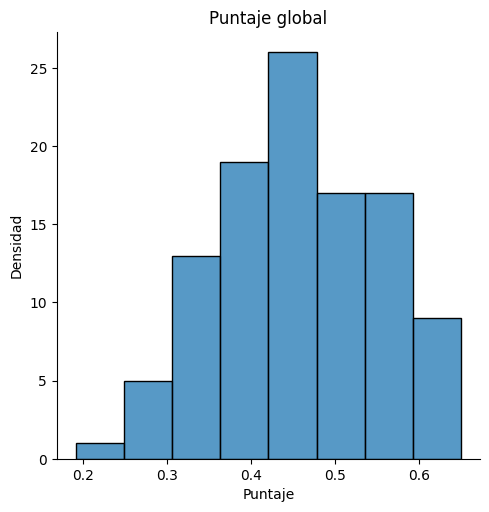

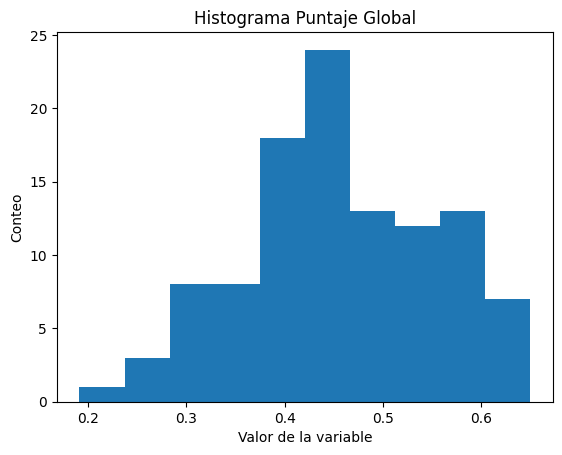

In [161]:
#Histogramas con métodos sns.displot(data) y plt.hist(data)
data = final_df_1['TOTAL_PRUEBA_ByF']
sns.displot(data)
plt.title('Puntaje global')
plt.xlabel('Puntaje')
plt.ylabel('Densidad')
plt.show()

plt.hist(data)
plt.title('Histograma Puntaje Global')
plt.xlabel('Valor de la variable')
plt.ylabel('Conteo')
plt.show()

**Contextualizacíon de las gráficas**

1. ***Gráfico de Densidad (sns.displot):*** Nos Representa los valores contenidos en la columna TOTAL_PRUEBA_ByF la cual posee el total de resultados del componente basico y funcional dela prueba psicometrica aplicada al sector poblacional definido y que se representa en el dataset ejeCafetero_compByF. La etiqueta **densidad** (eje y) representa el total de personas que obtuvieron esa calificacion y el **puntaje** (eje x) son los valores que contiene esa prueba comenzando de cero y llegando a 10.0 . Como se puede evidenciar, existe una agrupacion de valores entre 0.4 y 0.5 denotando que en ese rango se agrupan la mayoria de personas que presentaron dicho exámen.

  La forma del gráfico de densidad indica cómo se distribuyen los datos en términos de la probabilidad en la que se generaron esos datos. Se puede inferir que dicho grafico no es símetrico o en forma de campana, no conteniendo una distribucion normal, sino que es asímetrico, lo que indica que tiene una distribucion sesgada hacia los valores 0.4 a 0.6, lo cual nos indica que el grupo de personas que presentaron dicho examen se agrupanm en dichos resultados. Y el pico pronunciado en el valor 0.4 y 0.5 denota una concentracion de puntajes alrededor de esta calificacion.

2. ***Histograma (plt.hist):***  El histograma representa la frecuencia de los diferentes valores de 'TOTAL_PRUEBA_ByF'. Cada barra en el histograma muestra la cantidad de observaciones o valores que caen en un intervalo específico. La altura de las barras indica la frecuencia o conteo de valores en ese intervalo.
En el eje x se representan los posibles valores que puede tomar la variable 'TOTAL_PRUEBA_ByF', recordemos que esta columna sumariza el total del resultado de la prueba en su componente basico y funcional. Y en el eje Y se representa la frecuencia que cada valor tiene en los rangos definidos en la calificacion de dicho atributo. Como se pude evidenciar el historigrama posee una forma irregular o asimetrica.

  Los puntajes más altos se encuentran agrupados en los rangos 0.40 y 0.45 y la mayor concentracion de valores se encuentra agrupada en los rangos de 0.45 a 0.65 denotan que la mayoria de personas que presentaron la prueba psicometrica en el componente funcional y basico estan agrupadas en dicho resultado. Lo cual nos permite identificar los patrones de frecuencia que se presentan  en los valores y la concentracion de puntajes en diferentes rangos.






**Explicacion algoritmica y funcional del script**

**Gráfica de densidad del kernel (Seaborn displot):**

Este gráfico proporciona una estimación de la función de densidad de probabilidad de la variable "TOTAL_PRUEBA_ByF", y esencialmente muestra cómo se distribuyen las puntuaciones.

**Descripción analítica:** El gráfico ilustra la forma de la distribución, destacando picos y valles en los datos. El eje x representa el "Puntaje Global" y el eje y representa la densidad o probabilidad.
Histograma (de Matplotlib hist):

El histograma visualiza la distribución de frecuencia de las puntuaciones "TOTAL_PRUEBA_ByF", y muestra con qué frecuencia ocurren ciertos rangos de puntuación.

**Descripción analítica:** El eje x muestra el valor de la variable ("Valor de la variable") y el eje y muestra el recuento de ocurrencias ("Conteo"). Los picos y patrones en el histograma indican la prevalencia de rangos de puntuación específicos.

**Análisis de ajustador (Biblioteca de ajustador):**

La biblioteca Fitter se utiliza para ajustar los datos a diferentes distribuciones de probabilidad (gamma, lognormal, beta y normal) y determinar qué distribución se ajusta mejor a los datos observados.

**Descripción analítica:** Las distribuciones ajustadas y sus parámetros se resumen para ayudar a identificar la distribución teórica que se alinea más estrechamente con los datos empíricos. El resumen proporciona información como el Criterio de información de Akaike (AIC) y el Criterio de información bayesiano (BIC) para cada distribución, lo que ayuda a evaluar la bondad del ajuste.

Los gráficos iniciales (densidad del kernel e histograma) brindan información sobre la distribución y frecuencia de las puntuaciones "TOTAL_PRUEBA_ByF". El análisis de Fitter refina aún más esta comprensión al intentar hacer coincidir los datos con distribuciones de probabilidad conocidas. El objetivo es identificar la distribución que proporciona el mejor ajuste a las puntuaciones observadas, ayudando en la caracterización estadística del conjunto de datos.

> *Ahora analizaremos cada territorio o zona de examen, con la finalidad de comparar los diferentes resultados del examen del componente de preguntas de las dimensiones Basicas y Funcionales.*

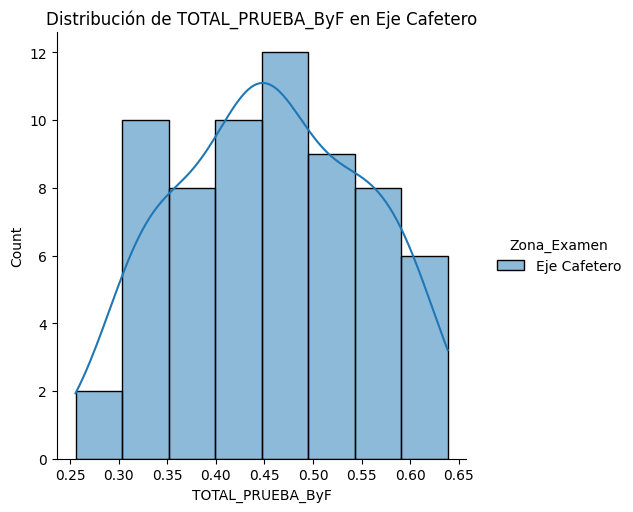

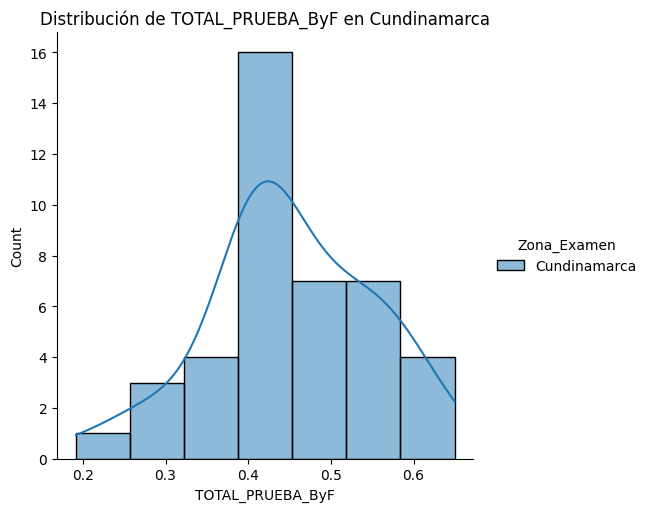

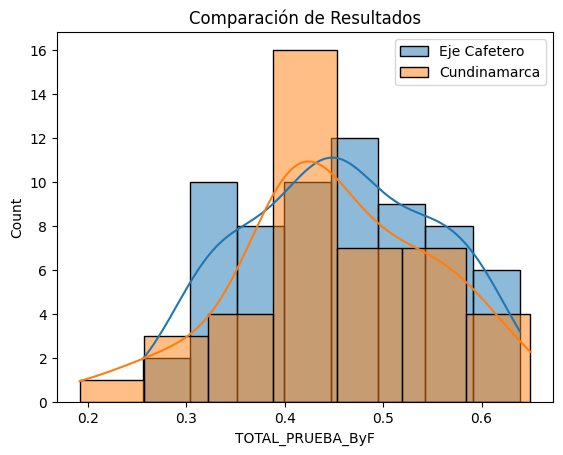

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar cada zona
df_eje = final_df_1[final_df_1['Zona_Examen'] == 'Eje Cafetero']
df_cundi = final_df_1[final_df_1['Zona_Examen'] == 'Cundinamarca']

# Gráficos de densidad con método sns.displot
sns.displot(data=df_eje, x='TOTAL_PRUEBA_ByF', kde=True, fill=True, hue='Zona_Examen')
plt.title('Distribución de TOTAL_PRUEBA_ByF en Eje Cafetero')
plt.show()

sns.displot(data=df_cundi, x='TOTAL_PRUEBA_ByF', kde=True, fill=True, hue='Zona_Examen')
plt.title('Distribución de TOTAL_PRUEBA_ByF en Cundinamarca')
plt.show()

# Histogramas superpuestos
sns.histplot(data=df_eje, x='TOTAL_PRUEBA_ByF', label='Eje Cafetero', kde=True)
sns.histplot(data=df_cundi, x='TOTAL_PRUEBA_ByF', label='Cundinamarca', kde=True)
plt.title('Comparación de Resultados')
plt.legend()
plt.show()

**Contextualizacíon de las gráficas**

En total 107 personas presentaron pruebas psicometricas para optar por un puesto de carrera administrativa ante el estado colombiano de las cuales 65 pertenecen a la zona del Eje Cafetero y 42 a la Zona de Cundinamarca. De los gráficos se puede contextualizar la siguiente informacíon:

1. De la distribucíon de datos de la zona cafetera podemos observar un farccionamiento mayor en los resultados originados en el total del componente de preguntas basicas y funcional con respecto al de cundinamarca al tener más personas que presentaron pruebas en ese territorio pero un puntaje total menor. Se presenta una relativa simetría en la gráfica lo que nos dá a entender que los participantes de esta prueba demuestran un dominio de conocimiento más amplio en todos los temas de Competencias_Ciudadanas, Lectura_Critica, Razonamiento_Cuantico, Competencia_Funcion_Publica y Competencias_Especificas en las dimensiones ya especificadas anteriormente en este notebbok. Sin embargo se hace necesario reforzar los contenidos y temas de estudio para mejorar los resultados porcentuales con miras a superar el maximo promedio que estuvo en 6.5 .

2. La zona de Cundinamarca presenta dos observaciones principales; la primera es que los puntajes totales poorcentuales están por debajo del sector del eje cafetero lo que lleva a prestar más atencion en las actividades de capacitacíon previas a la presentacion del exámen. Y presenta una acumulacion de mayor de estudiantes con una nota de 4.5. Tiene un rango porcentual igualitario en los puntajes de 4.6 a 5.8 lo que lleva a que el total de estudiantes no superen el minimo requerido para esta prueba y el total de personas que superaron la prueba sea menor al total obtenido por estudiantes del eje cafetero.

3. Las dos líneas que bordean los gráficos representan la estimación de la densidad de la distribución de datos en el eje vertical. Estas líneas indican cómo se distribuyen los valores a lo largo del rango de la variable en el eje horizontal. En un gráfico de densidad, estas líneas a menudo se llaman "curvas de kernel" o "curvas de densidad de kernel". Representan una suavización de la distribución subyacente de los datos y proporcionan una representación visual de la forma de la distribución. En el contexto de las gráficas de densidad que has generado con Seaborn, estas líneas suaves representan la estimación de la función de densidad de probabilidad (PDF) de la variable 'TOTAL_PRUEBA_ByF' para cada zona ('Eje Cafetero' y 'Cundinamarca'). La altura de la curva en un punto dado indica la probabilidad relativa de que un valor caiga en ese rango.

> **Realizamos una segmentacion por cargos totalizando la zona del eje cafetero y Cundinamarca visualizando la informacion con una grafica tipo pie (pastel)**







Text(0.5, 1.0, 'Tipo de cargo')

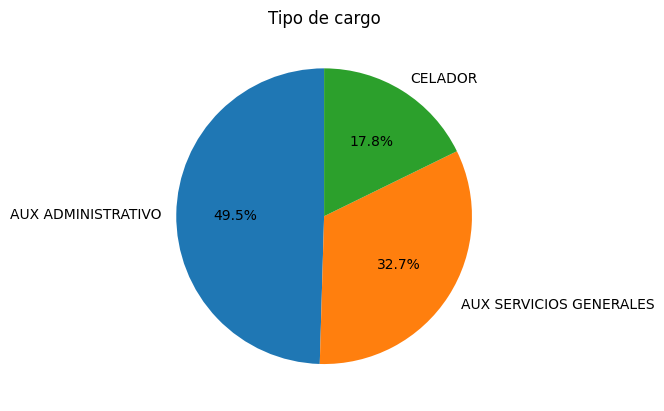

In [163]:
data = final_df_1['Cargo'].value_counts()/final_df_1['Cargo'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', startangle = 90)
plt.title('Tipo de cargo')

*En esta gráfica tipo pie **(pastel)** podemos visualizar el dominio de aplicacion de pruebas en el conjunto de estudiantes y podemos determinar que del 100% de individuos un 49% corresponden a auxiliares administrativos, un 17.8% corresponden a celadores y un 32.7% corresponden a auxiliares de servicios generales*.

**Utilizando matplotlib y Seaborn para generar una comparacion de datos utilizando el parametro "hue" se realiza la comparacion de datos en el dataset Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compByF componente competencias Basicas y Funcionales.**

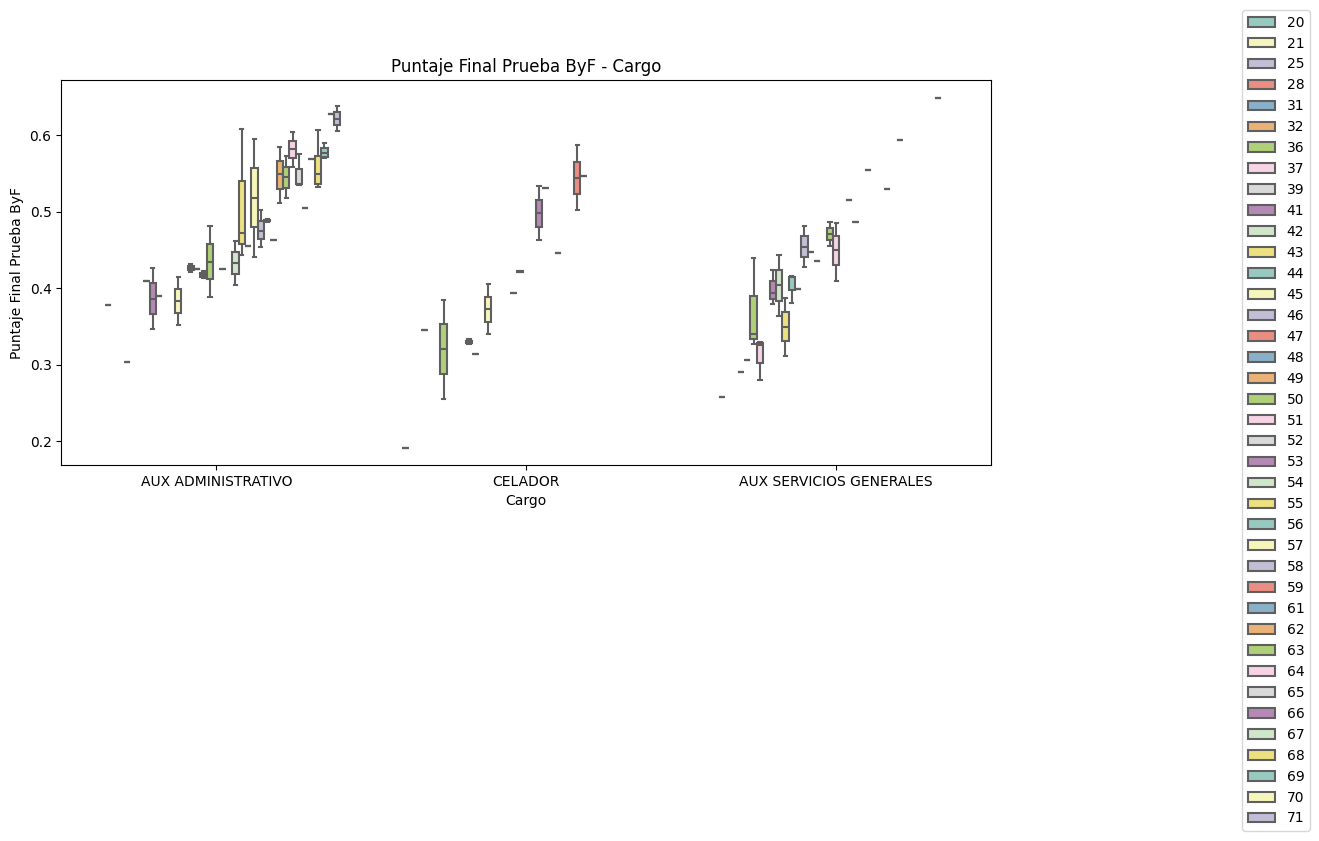

In [164]:
plt.figure(figsize = (12,5))
sns.boxplot(x="Cargo", y= "TOTAL_PRUEBA_ByF", hue="Num Correct",
                 data= final_df_1, linewidth=1.5, palette="Set3")
plt.title("Puntaje Final Prueba ByF - Cargo")
plt.xlabel("Cargo")
plt.ylabel("Puntaje Final Prueba ByF")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='best')
plt.show()

**Contextualizacíon de la gráfica**

Esta visualización nos permite comparar cómo se distribuyen los puntajes finales de la prueba psicométrica entre diferentes cargos en el área de competencias basicas y funcionales, y cómo esta distribución varía según la cantidad de respuestas correctas. Se puede observar que el grupo de auxiliares administrativos posee un mayor número de aciertos o respuestas correctar frente a los otros dos grupos (celadores y auxiliares de servicios generales). Por ende se debe reforzar las competencias de lectura critica, razonamiento cuantitativo y competencias basicas y funcionales en estos dos grupos, especialmente en el grupo de celadores ya que se denota una aspersion mayor en el resultado de preguntas validas y menos concentracion de grupos de preguntas verdaderas contestadas en la prueba psicométrica.

**Explicacion algoritmica y funcional del script**

El diagrama de caja generado por el script proporciona una representación visual de la distribución de *Puntaje Final Prueba ByF* entre diferentes puestos de trabajo ("Cargo"), teniendo en cuenta la variable "Num Correct" para una mayor diferenciación. Si bien el diagrama de caja en sí no proporciona valores matemáticos específicos, ofrece información valiosa sobre la tendencia central y la dispersión de los datos.

**Mediana (Línea dentro del cuadro):** La línea dentro de cada cuadro representa la mediana (percentil 50) del “Puntaje Final Prueba ByF” para cada puesto de trabajo. Da una idea de la tendencia central de las puntuaciones.

**Rango intercuartil (cuadro):** el cuadro en sí representa el rango intercuartil (IQR), que es el rango entre los percentiles 25 y 75. Proporciona una medida de la dispersión del 50% medio de los datos.

**Bigotes:** Los bigotes se extienden desde el cuadro para mostrar el rango de los datos, excluyendo los valores atípicos. Los valores atípicos, si están presentes, se pueden trazar individualmente.

**Valores atípicos (puntos individuales):** cualquier punto individual más allá de los bigotes se considera valor atípico. Estos son puntos de datos que quedan significativamente fuera del rango típico de puntuaciones.

**Tono (diferenciación de color):** el parámetro de tono distingue puntos de datos según la variable "Num Correct". Diferentes colores dentro de cada cuadro resaltan variaciones en el "Puntaje Final Prueba ByF" basadas en la exactitud de las respuestas.

**Utilizando matplotlib y Seaborn para generar una comparacion de datos utilizando el parametro "hue", se realiza la comparacion de datos en el dataset Dataset_Reporte_Eje_Cafetero_Cundinamarca_Vr2 hoja de calculo ejeCafetero_compCompt componente competencias comportamentales.**

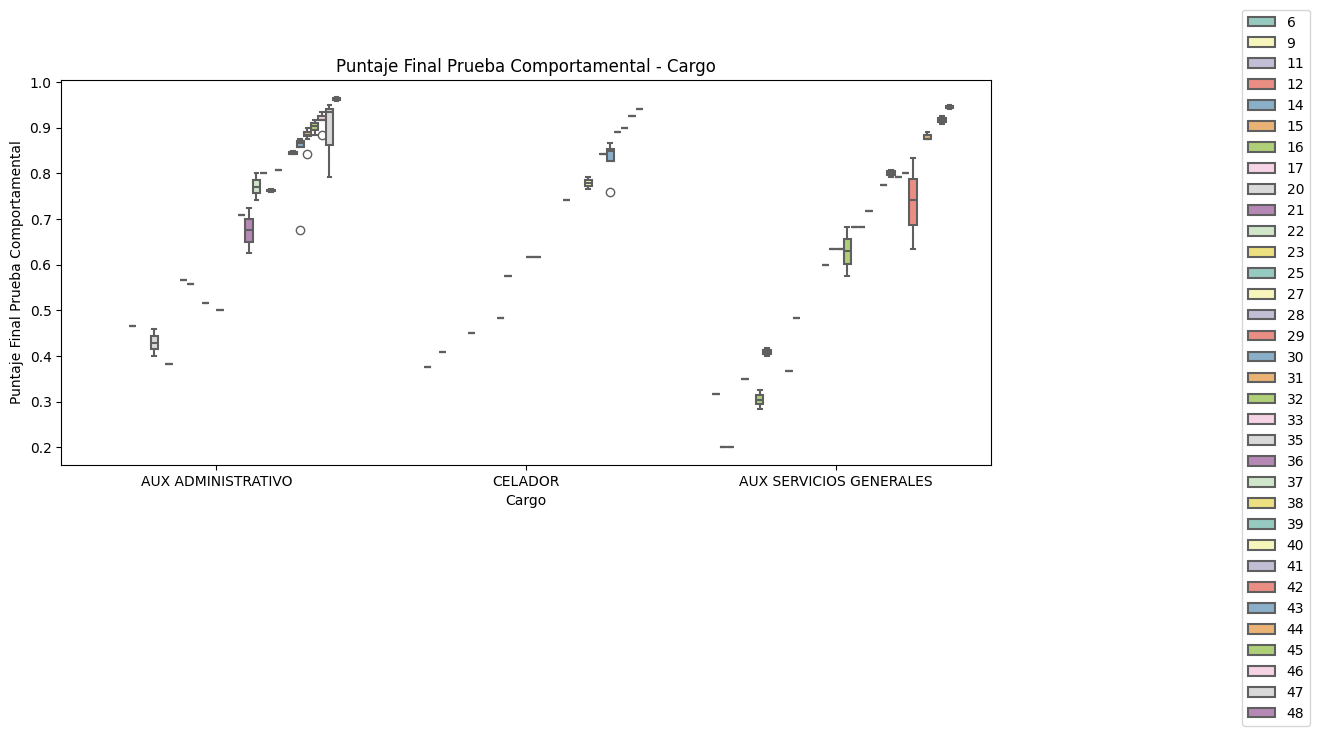

In [165]:
plt.figure(figsize = (12,5))
sns.boxplot(x="Cargo", y= "TOTAL_PRUEBA_COMPORTAMENTAL", hue="Num Correct",
                 data= final_df_2, linewidth=1.5, palette="Set3")
plt.title("Puntaje Final Prueba Comportamental - Cargo")
plt.xlabel("Cargo")
plt.ylabel("Puntaje Final Prueba Comportamental")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='best')
plt.show()

**Contextualizacíon de la gráfica**


Esta visualización nos permite comparar cómo se distribuyen los puntajes finales de la prueba psicométrica entre diferentes cargos en el área de competencia comportamental, y cómo esta distribución varía según la cantidad de respuestas correctas. Nuevamente se observa unas competencias en lectura y análisis más desarrollado en el grupo de auxiliares administrativos frente a los otros dos grupos (celadores y auxiliares de servicios generales). Se hace necesario reforzar las actividades de lectura critoca y razonamiento cuantitativo en el grupo de celadores ya que carecen de las competencias cognitivas necesarias para interpretar los textos y generar posteriores calificaciones satisfactorias. Y en el grupo de auxiliares de servicios generales se evidencia un agrupamiento de respuestas validas en un conjunto de respuestas (grupo 15 y 16).

**Explicacion algoritmica y funcional del script**

**Mediana (línea dentro del cuadro):**

Significado: La línea dentro de cada casilla representa la puntuación mediana del "Puntaje Final Prueba Comportamental" para cada puesto de trabajo.
Descripción estadística: La mediana es el valor medio del conjunto de datos. Divide los datos en dos mitades iguales, indicando la tendencia central. Es resistente a valores extremos.
Rango intercuartil (cuadro):

**Significado:** El cuadro representa el rango intercuartil (IQR), que indica la distribución del 50% medio de las puntuaciones para cada puesto de trabajo.
Descripción estadística: El IQR es el rango entre los percentiles 25 y 75. Proporciona una medida de dispersión que es menos sensible a valores extremos que el rango completo.
Bigotes:

**Significado:** Los bigotes muestran el rango de los datos, excluyendo los valores atípicos.
Descripción estadística: Los bigotes se extienden hasta los valores mínimo y máximo dentro de un rango determinado, excluyendo los valores atípicos. Dan una idea de la distribución general de los datos.
Valores atípicos (puntos individuales):

**Significado:** los puntos individuales más allá de los bigotes se consideran valores atípicos.
Descripción estadística: Los valores atípicos son valores que quedan significativamente fuera del rango típico. Podrían representar puntuaciones extremas o errores en los datos.

**Tono (diferenciación de color):**

**Significado:** Diferentes colores dentro de cada cuadro indican variaciones en el "Puntaje Final Prueba Comportamental" con base en la variable "Num Correct".

**Descripción estadística:** La diferenciación de colores ayuda a identificar cómo la exactitud de las respuestas influye en la distribución de las puntuaciones dentro de cada categoría laboral. Proporciona información adicional sobre patrones potenciales.

Se podría describir la tendencia central, la dispersión y la variabilidad del "Puntaje Final Prueba Comportamental" entre diferentes puestos laborales. Además, se puede comentar sobre la influencia de la variable "Num Correct" en estas puntuaciones, como lo indica la diferenciación codificada por colores. También sería relevante resaltar cualquier valor atípico y su posible impacto en la interpretación.

**Agruparemos la informacíon del dataset ejeCafetero_compByF perteneciente al componente de competencias Básicas y Funcionales de una manera resumida y visualizaremos los resultados de la dimensíon competencias ciudadanas.**

In [166]:
df = ejeCafetero_compByF.groupby(['Numero ','Nombres completos', 'Documento', 'Cargo']).agg({
    'Total_respuestasCC': 'sum',
    'Total_CompetenciasCiudadanas': lambda x: x.mean() * 100  # Multiplica por 100 para obtener el porcentaje
}).reset_index()
df.head()

,Numero,Nombres completos,Documento,Cargo,Total_respuestasCC,Total_CompetenciasCiudadanas
0,1,AGUIRRE RIOSSANDRA PATRICIA,41934061,AUX ADMINISTRATIVO,9,55.555556
1,2,ALZATE VALENCIANORA MILBIA,33818993,AUX ADMINISTRATIVO,9,44.444444
2,3,ARANGO DUARTE LUIS FERNANDO,10124627,CELADOR,9,44.444444
3,4,BERNAL VALENCIA GUSTAVO,1364341,AUX SERVICIOS GENERALES,9,55.555556
4,5,BONILLA QUIROGA VICTORIANO,16783042,AUX SERVICIOS GENERALES,9,33.333333


**Vamos a analizar los resultados de las pruebas de Basicas y Funcionales *(modulo competencias Especificas)* del conjunto de individuos que presentaron la prueba**

In [167]:
df = ejeCafetero_compByF.groupby(['Numero ','Nombres completos', 'Documento', 'Cargo']).agg({
    'Total_RespuestasCE': 'sum',
    'Total_CompetenciasEspecificas': lambda x: x.mean() * 100  # Multiplica por 100 para obtener el porcentaje
}).reset_index()
df.head()

,Numero,Nombres completos,Documento,Cargo,Total_RespuestasCE,Total_CompetenciasEspecificas
0,1,AGUIRRE RIOSSANDRA PATRICIA,41934061,AUX ADMINISTRATIVO,50,70.0
1,2,ALZATE VALENCIANORA MILBIA,33818993,AUX ADMINISTRATIVO,50,66.0
2,3,ARANGO DUARTE LUIS FERNANDO,10124627,CELADOR,50,68.0
3,4,BERNAL VALENCIA GUSTAVO,1364341,AUX SERVICIOS GENERALES,50,38.0
4,5,BONILLA QUIROGA VICTORIANO,16783042,AUX SERVICIOS GENERALES,50,32.0


In [168]:
print(df.columns)

Index(['Numero ', 'Nombres completos', 'Documento', 'Cargo',
       'Total_RespuestasCE', 'Total_CompetenciasEspecificas'],
      dtype='object')


> **Repetimos el proceso anterior con nueva info de la hoja de calculo ejeCafetero_compCompt**

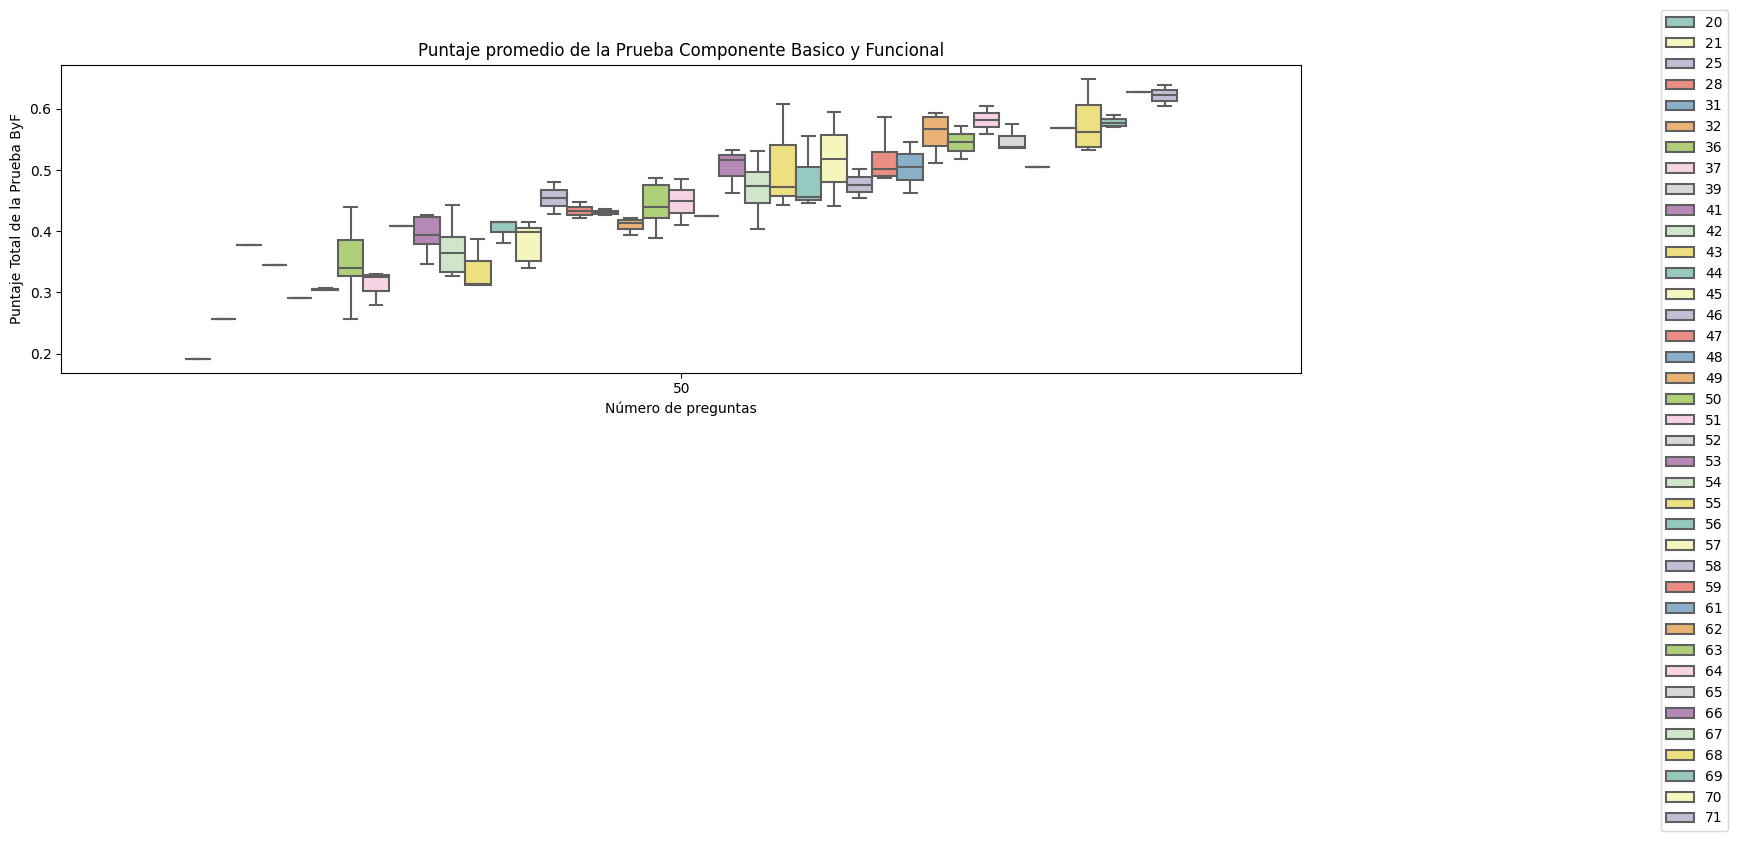

In [169]:
plt.figure(figsize=(16,4))
sns.boxplot( y = final_df_1["TOTAL_PRUEBA_ByF"], x = final_df_1["Total_RespuestasCE"], hue=final_df_1["Num Correct"],
            data= final_df_1, linewidth=1.5, palette="Set3")
plt.title("Puntaje promedio de la Prueba Componente Basico y Funcional")
plt.xlabel("Número de preguntas")
plt.ylabel("Puntaje Total de la Prueba ByF")
plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='best')
plt.show()

> **Contextualizacíon de la gráfica**

*La gráfica nos permite visualizar cómo se distribuyen los puntajes totales en el componente básico y funcional de la prueba en relación con el número de preguntas de competencias específicas, y cómo estos patrones pueden variar según el número de respuestas correctas. Esto nos permite identificar tendencias y posibles correlaciones en los datos.*

*El número total de preguntas del componente Basico y Funcional es de 100 representado en el eje X, y en el eje Y se puede visualizar el puntaje minimo y maximo de cada pregunta, que puede variar de 1 a 10. En este diagrama de boxplot podemos interpretar que cada caja corresponde a una pregunta y muestra la distribucion de los puntajes en función del número de preguntas totales. Se puede indicar que los diferentes niveles de preguntas correctas varian en funcion de su complejidad y que se hace necesario reforzar el contenido curricular y academico del primer conjunto de preguntas que va hasta la número 50. Se observan valores atipicos en algunas cajas o preguntas, pero a efectos practicos de implementar planes de mejora en los paquetes de estudio se tendran en cuenta solo las cajas que representan datos.*








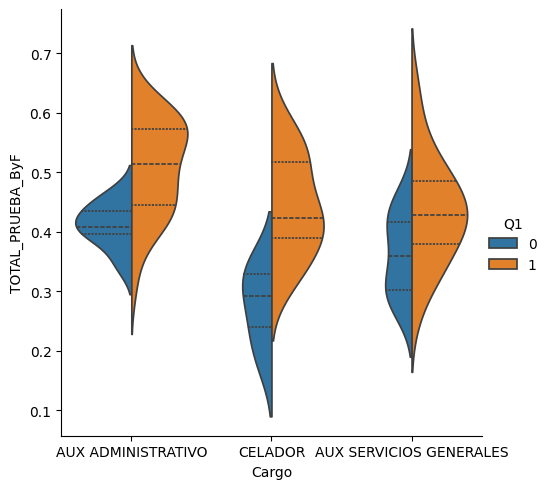

In [170]:
# Cambiamos de estilo de grafica con la libreria Seaborn para encontrar nuevos patrones
data= final_df_1
sns.catplot(x="Cargo", y="TOTAL_PRUEBA_ByF", hue="Q1", inner="quartile",kind="violin", data=data, split= True)
plt.show()

> **Contextualizacíon de la gráfica**

*Realizando el análisis de la anterior grafica con nuevos parámetros podemos observar que la media es mucho más alta en los cargos de auxiliares administrativos y que es más baja en los cargos de celadores y su varianza es menor que en los otros grupos. La pregunta Q1 corrresponde a la dimension de competencias ciudadanas en el grupo de preguntas del componente Basico y Funcional de la prueba y se quizo comparar como fue el desempeño de cada uno de los grupos (auxiliares administrativos, celadores y auxiliares de servicios generales) en esta pregunta concreta.  Por otro lado vemos una agrupacion de puntajes medios más concentrados en el indicador "TOTAL_PRUEBA_Byf" en los cargos de auxiliares de servicios generales. Y que los resultados más altos varian de grupo a grupo.*

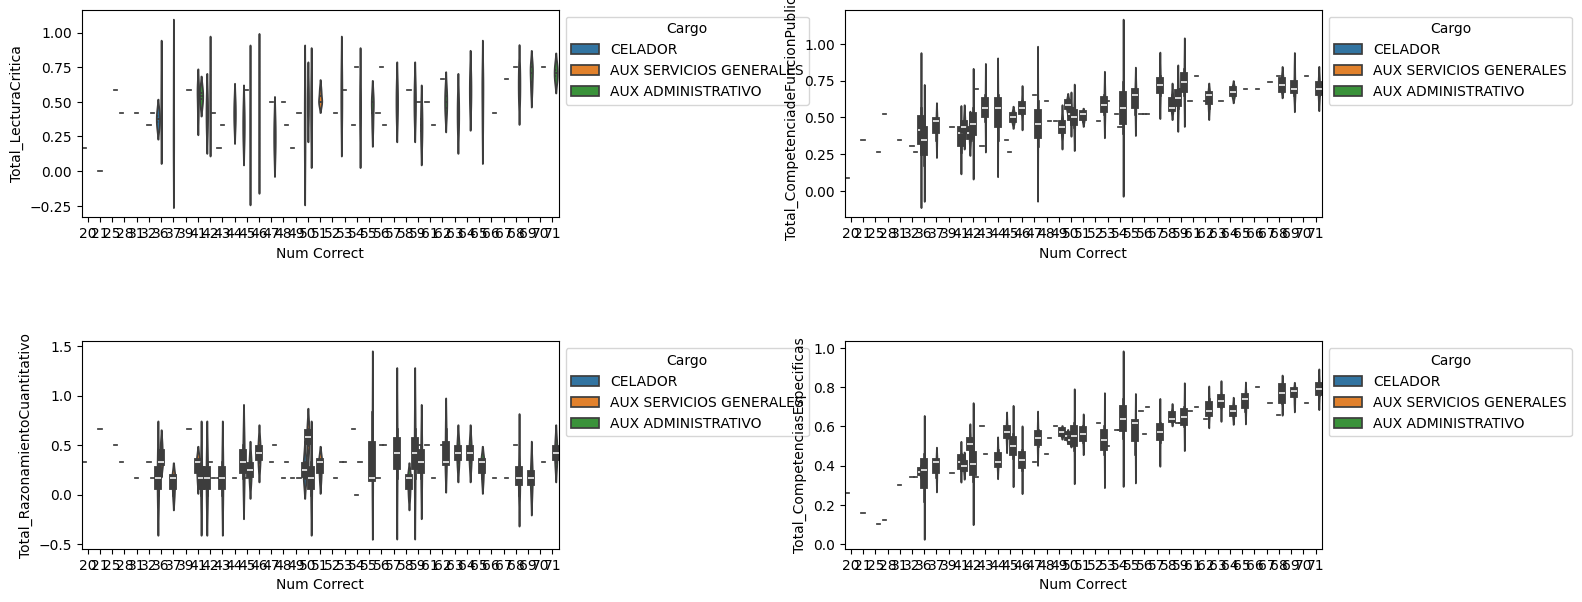

In [171]:
data= final_df_1
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(16, 7)

fig.subplots_adjust(hspace=0.6, wspace=0.6)

sns.violinplot(y = "Total_LecturaCritica", x = "Num Correct", hue="Cargo",
               data = data, inner="quartile",ax = ax[0, 0])


sns.violinplot(y =  "Total_RazonamientoCuantitativo", x = "Num Correct", hue="Cargo",
               data = data, ax = ax[1, 0])


sns.violinplot(y = "Total_CompetenciadeFuncionPublica", x = "Num Correct", hue="Cargo",
               data = data, ax = ax[0, 1])

sns.violinplot(y = "Total_CompetenciasEspecificas", x = "Num Correct", hue="Cargo",
               data = data, ax = ax[1, 1])

sns.move_legend(ax[0, 0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1, 0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[0, 1], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax[1, 1], "upper left", bbox_to_anchor=(1, 1))

*En este paso se utilizará un metodo diferente con subplots para comparar si el numero de respuestas correctas de la prueba ByF (basica y funcional) funciona con respecto a las notas de cada una de las competencias*


> **Contextualizacíon de la gráfica**

Se realiza esta gráfica para medir el desempeño de cada grupo de estudiantes (auxiliares administrativos, celadores y auxiliares de servicios generales) en cada conjunto de preguntas de las dimensiones (lectura critica, razonamiento cuantitativo, Competencia de Funcion Publica y competencias especificas) del componente basico y funcional de la prueba y podemos inferir que:

1. En el gráfico comparativo de la dimensíon de lectura critica existe una relativa homogenizacion de respuestas correctas en los grupos, salvo en las preguntas 35 a 56 del grupo de celadores, las cuales se deben reforzar con planes de estudio y lectura para poder; Comprender cómo se articulan las partes de un texto para darle un sentido global, identificar y entender contenidos locales que conforman un texto y reflexionar a partir de un texto y evaluar su contenido .

2. En el gráfico comparativo de la dimension de competencia de función pública se observa una carencia de conocimientos en el grupo de auxiliares de servicios generales lo que llevo a un bajo desempeño en dicho grupo de preguntas. Se debe priorizar el estudio de las dimensiones de; utilizacion de recursos de la entidad para el desarrollo de las labores y la prestación del servicio y ejecucíon de funciones con base en las normas y criterios aplicables al cargo específico.

3. En el gráfico comparativo de la dimension razonamíento cuantitativo el grupo de auxiliares administrativos demuestra un desempeño óptimo en este grupo de preguntas frente a los démas. Se deben fortalecer los contenidos temáticos de las dimensiones de; comprensíon y transformacíon de información cuantitativa y esquemática presentada en distintos formatos, validacíon de procedimientos y estrategias matemáticas utilizadas para dar solución a problemas y planteamiento de afirmaciones que sustentan o refutan una interpretación dada a la información disponible en el marco de la solución de un problema.

4.  En el gráfico comparativo de la dimension competencias específicas compuesta por las dimensiones de evalúacion y determinacion del éxito de un individuo al desempeñar las tareas a su cargo, en el desempeño concreto al cargo que aspira, y relación con funciones o puestos de trabajo. Todos los grupos presentan un bajo desempeño en la resolucion de dichas preguntas, solo concentrandose un gran número de aciertos en las preguntas 24, 35, 45, 56 y 63 del grupo de auxiliares administativos. Por ende se debe reforzar el material de estudio en esta dimensíon equitativamente para todos los grupos.  

**Explicacion algoritmica y funcional del script**

**Interpretación analítica:**

**Comparación general:** las tramas secundarias proporcionan una comparación visual de la distribución de las respuestas correctas para la prueba básica y funcional en diferentes competencias y puestos de trabajo.
Información sobre competencias: cada subtrama se centra en una competencia específica, lo que permite un análisis en profundidad de cómo varía el número de respuestas correctas dentro de los diferentes puestos de trabajo.

**Interpretación matemática:**

**Gráficos de violín:** los gráficos de violín muestran la distribución de los datos, combinando aspectos de los diagramas de caja y los diagramas de densidad del núcleo.

*Eje x (“Num Correct”):* Representa el número de respuestas correctas en la prueba básica y funcional.

*Eje y (puntajes de competencia):* representa los puntajes en cada competencia.
Tono ("Cargo"): diferentes colores dentro de cada gráfico representan diferentes puestos de trabajo, lo que proporciona información sobre las variaciones en las puntuaciones de competencia según los roles laborales.

*Cuartiles y distribuciones:* el ancho del gráfico del violín en un valor específico de "Num Correct" indica la densidad de las partituras, mientras que los cuartiles interiores proporcionan información sobre la dispersión de los datos.

*Leyenda:* La leyenda se mueve hacia la parte superior izquierda para brindar claridad con respecto a los puestos de trabajo representados por diferentes colores.

Para el caso de la ultima grafica se puede observar que todos los puntajes conservar una relativa homogeneidad en sus resultados.

Esta descripcion facilita un análisis detallado de cómo varían los puntajes de competencias en función del número de respuestas correctas en la prueba básica y funcional, considerando diferentes puestos laborales. El uso de gráficos de violín permite una comprensión matizada de la distribución y densidad de las partituras dentro de cada competencia.

***Se realiza la impresion de las columnas resultantes del dataset final_df_1 con los cambios que se estipularon y las columnas que se eliminaron para trabajar solo la informacion esencial***

In [172]:
final_df_1.drop(['Nombres completos', 'Quiz Name'], axis=1)

,Numero,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Componente_1,Q1,Q2,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
0,1,41934061,AUX ADMINISTRATIVO,Eje Cafetero,100,63,63,Competencias_Ciudadanas,1,1,...,0,1,1,1,0,35,15,50,0.70,0.572850
1,2,33818993,AUX ADMINISTRATIVO,Eje Cafetero,100,62,62,Competencias_Ciudadanas,1,0,...,0,1,0,0,0,33,17,50,0.66,0.584657
2,3,10124627,CELADOR,Eje Cafetero,100,56,56,Competencias_Ciudadanas,1,1,...,0,0,1,1,1,34,16,50,0.68,0.445903
3,4,1364341,AUX SERVICIOS GENERALES,Eje Cafetero,100,41,41,Competencias_Ciudadanas,1,1,...,0,0,0,0,0,19,31,50,0.38,0.424068
4,5,16783042,AUX SERVICIOS GENERALES,Eje Cafetero,100,42,42,Competencias_Ciudadanas,1,0,...,0,0,0,0,1,16,34,50,0.32,0.443710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,35530905,AUX SERVICIOS GENERALES,Cundinamarca,100,44,44,Competencias_Ciudadanas,1,1,...,1,1,0,1,1,24,26,50,0.48,0.415565
103,104,20928360,AUX ADMINISTRATIVO,Cundinamarca,100,45,45,Competencias_Ciudadanas,1,1,...,0,0,0,0,0,22,28,50,0.44,0.414570
104,105,348300,CELADOR,Cundinamarca,100,36,36,Competencias_Ciudadanas,1,0,...,1,1,0,0,1,18,32,50,0.36,0.385285
105,106,20886505,AUX ADMINISTRATIVO,Cundinamarca,100,42,42,Competencias_Ciudadanas,0,1,...,0,0,0,1,0,17,33,50,0.34,0.390464


*Se crea la variable* ***final_df_corr*** *con la finalidad de crear un arreglo con los campos necesarios para crear una grafica de correlacionamiento y asi continuar con el análisis de la informacíon de los datasets.*

In [173]:
final_df_corr = final_df_1[['Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica', 'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica', 'Total_CompetenciasEspecificas', 'TOTAL_PRUEBA_ByF']]

>  *Usaremos la matriz de correlacion para comenzar a verificar cuales pueden ser nuestras variables mas importantes.*

In [174]:
final_df_corr = final_df_corr.corr()
final_df_corr

,Num Correct,Total_CompetenciasCiudadanas,Total_LecturaCritica,Total_RazonamientoCuantitativo,Total_CompetenciadeFuncionPublica,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
Num Correct,1.000000,0.538513,0.486315,0.030825,0.781450,0.921073,0.893858
Total_CompetenciasCiudadanas,0.538513,1.000000,0.277883,0.014344,0.305234,0.417179,0.652460
Total_LecturaCritica,0.486315,0.277883,1.000000,-0.034094,0.402071,0.252305,0.619700
Total_RazonamientoCuantitativo,0.030825,0.014344,-0.034094,1.000000,-0.002861,-0.086497,0.339891
Total_CompetenciadeFuncionPublica,0.781450,0.305234,0.402071,-0.002861,1.000000,0.560758,0.731928
Total_CompetenciasEspecificas,0.921073,0.417179,0.252305,-0.086497,0.560758,1.000000,0.687517
TOTAL_PRUEBA_ByF,0.893858,0.652460,0.619700,0.339891,0.731928,0.687517,1.000000


**Gráfico de correlacion de variables**

> *Utilizamos la libreria Seaborn para ver mas claramente donde estan las variables que más nos interesan y de las cuales generáremos un análisis más concreto de informacíon.*

<Axes: >

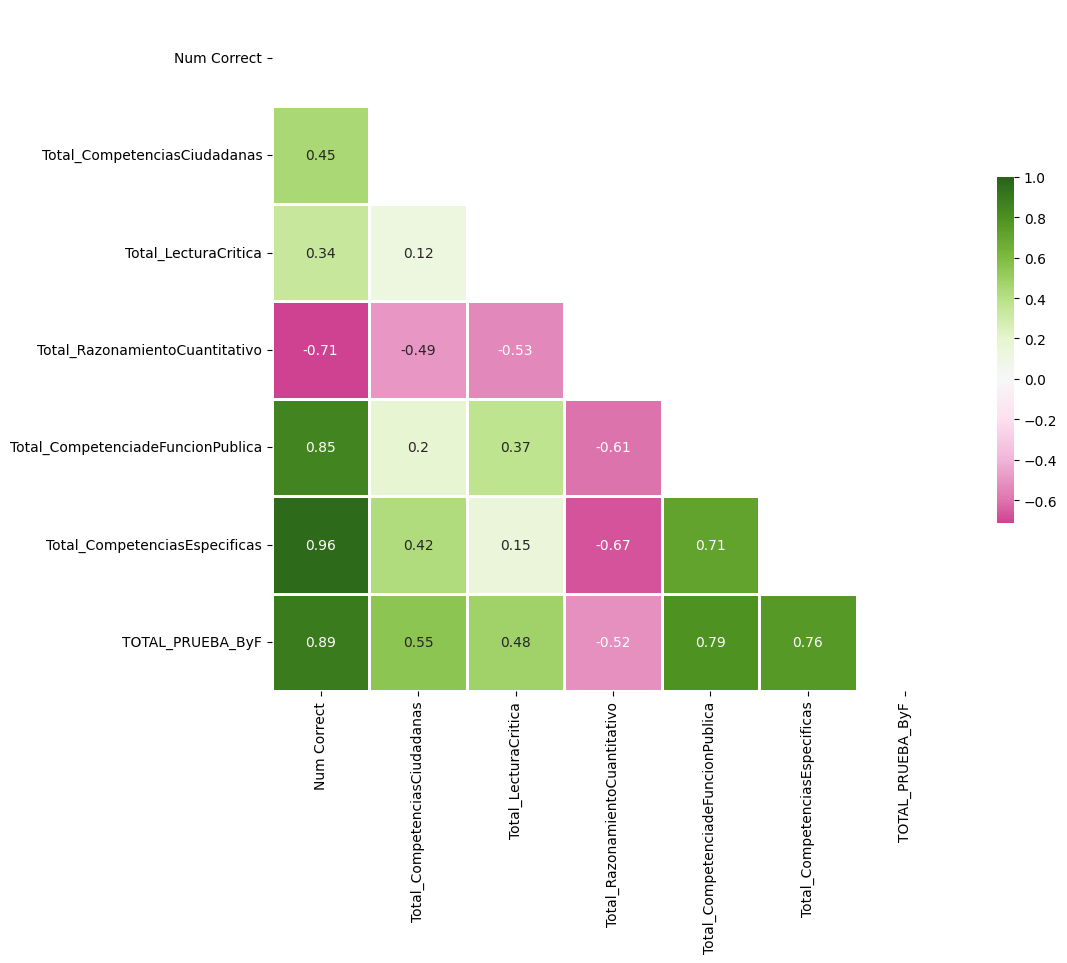

In [175]:
corr = final_df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(1000, 1000, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap="PiYG",annot=True, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5})

> **Contextualizacíon de la gráfica**

El mapa de calor establecido en la libreria seaborn nos permite comprender la estructura de correlacion entre las variables de un conjunto de datos. Nos ayuda a identificar relaciones fuertes o debiles, positivas o negativas lo que nos lleva a desarrollar el siguiente análisis:

1. En la variable definida como final_df_corr se declara un arreglo con los siguientes valores: ['Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica', 'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica', 'Total_CompetenciasEspecificas', 'TOTAL_PRUEBA_ByF']. Los cuales contienen los resultados finales de los componentes basicos y funcionales y de competencias comportamentales de las pruebas psicometricas aplicadas al conjunto de personas que presentaron tal test.

2. Se puede observar como los tonos más oscuros (verde) indican valores positivos en la relacion de variables y valores en color claro (rosado) resaltan valores negativos en la relacion de variables.

3. La dimension razonamiento cuantitativo es la que posee los resultados más negativos o bajos en su correlacion con las dimensiones de competencias ciudadanas y lectura critica. La dimension de razonamiento cuantitativo agrupa competencias como : "Validacion de procedimientos y estrategias matemáticas utilizadas para dar solución a problemas", "Planteamiento de afirmaciones que sustentan o refutan una interpretación dada a la información disponible en el marco de la solución de un problema", "Comprende y transforma la información cuantitativa y esquemática presentada en distintos formatos". Por ende, se necesita implementar planes de mejora y refuerzo de habilidades en los candidatos que vayan a presentar futuras pruebas psicometricas en estos campos. Ya que es la dimension con los porcentajes más bajos o negativos de esta prueba psicometrica.  

4. La dimension TOTAL_PRUEBA_ByF es la que presenta más correlaciones con las demás dimensiones planteadas en el script y la que solo presenta una relacion negativa con la dimension de razonamiento cuantitativo. Por ende se debe reforzar las competencias de componente basico y funcional enfocado a la dimension de razonamiento cuantitativo. Y las relaciones con mayores valores positivos las tiene con las dimensiones de competencias especificas que agrupan: "Evaluacion y determinacion del éxito de un individuo al desempeñar las tareas a su cargo, en el desempeño concreto al cargo que aspira, y relación con funciones o puestos de trabajo" y la dimension de Competencia de función pública que agrupa la competencia de "ejecucion de funciones con base en las normas y criterios aplicables" y "uso de recursos de la entidad para el desarrollo de las labores y la prestación del servicio".

>  **Explicacion algoritmica y funcional del script**

 Se genera un mapa de calor de matriz de correlación utilizando la libreria  Seaborn, la cual visualiza los coeficientes de correlación entre diferentes variables en su conjunto de datos.

**Interpretación analítica:**

*Análisis de correlación general:* el mapa de calor proporciona una representación visual clara de la correlación entre pares de variables en su conjunto de datos.

*Degradados de color:* los colores del mapa de calor representan la fuerza y ​​la dirección de la correlación. Las correlaciones positivas se indican mediante un gradiente de color, mientras que las correlaciones negativas se indican mediante otro.

*Anotaciones:* los valores numéricos se anotan dentro de cada celda del mapa de calor, mostrando los coeficientes de correlación reales.

*Máscara de triángulo:* el triángulo superior del mapa de calor suele estar enmascarado para evitar redundancia, ya que la matriz de correlación es simétrica. Esto se logra usando np.triu(np.ones_like(corr, dtype=bool)).

**Interpretación matemática:**

*Coeficiente de correlación (r):* El coeficiente de correlación mide la fuerza y ​​la dirección de una relación lineal entre dos variables. Varía de -1 a 1, donde -1 indica una correlación negativa perfecta, 1 indica una correlación positiva perfecta y 0 indica que no hay correlación.

*Colores del mapa de calor:* los colores del mapa de calor representan los valores de correlación. A las correlaciones positivas se les puede asignar un gradiente de color (p. ej., verde), mientras que a las correlaciones negativas se les puede asignar otro (p. ej., rosa).

*Anotaciones:* los valores numéricos dentro de cada celda del mapa de calor indican los coeficientes de correlación reales. Estos valores cuantifican el grado y dirección de la relación entre las variables correspondientes.

*Forma cuadrada:* la forma cuadrada del mapa de calor y la línea diagonal representan la simetría de la matriz de correlación. Los elementos diagonales siempre tienen una correlación de 1 (correlación perfecta consigo mismos).

este script permite evaluar visualmente la estructura de correlación de su conjunto de datos. Puede identificar qué variables están fuertemente correlacionadas, lo que puede ser crucial para comprender las relaciones y la posible multicolinealidad en los análisis estadísticos. El mapa de calor proporciona una visión tanto cualitativa como cuantitativa de las correlaciones entre variables.

# **Fase 4: Creacion de modelo predictivo con regresion logistica y regresion lineal multivariada**

Crear un modelo predictivo utilizando regresión logística y regresión lineal multivariada en el contexto de un modelo de aprendizaje supervisado tiene como finalidad realizar predicciones basadas en datos y patrones identificados en un conjunto de datos. Por esta razón y para efectos practicos del modelo supervisado de ML del modelo se aplicaron estas dos metodologías que a continuacíon se explican:

> **Regresión Lineal Multivariada:**

Finalidad: La regresión lineal multivariada se utiliza cuando hay múltiples variables independientes que pueden afectar a una variable dependiente. La finalidad principal es modelar la relación lineal entre estas variables independientes y la variable dependiente.

Aplicación en Aprendizaje Supervisado: En un contexto de aprendizaje supervisado, las variables independientes se utilizan para predecir un resultado específico. Por ejemplo, si estás trabajando con datos de ventas, las variables independientes podrían ser el gasto en publicidad, el número de vendedores, etc., y la variable dependiente sería la cantidad de ventas. El modelo busca establecer una relación lineal que pueda predecir las ventas en función de las otras variables.

 > **Regresión Logística:**

Finalidad: La regresión logística se utiliza cuando la variable dependiente es binaria, es decir, tiene dos categorías (como sí/no, 1/0). La finalidad es modelar la probabilidad de que un evento ocurra en función de una o más variables independientes.

Aplicación en Aprendizaje Supervisado: En aprendizaje supervisado, la regresión logística es comúnmente utilizada para problemas de clasificación binaria, como predecir si un correo electrónico es spam o no, si un cliente comprará o no un producto, etc. El modelo calcula la probabilidad de que un evento pertenezca a una de las dos categorías y luego clasifica el evento en la categoría con la probabilidad más alta.

Ambos modelos, la regresión lineal multivariada y la regresión logística, son herramientas poderosas en el ámbito del aprendizaje supervisado y se aplican según la naturaleza de los datos y del problema que estás tratando de resolver. Estos modelos permiten entender las relaciones entre variables, realizar predicciones y tomar decisiones informadas basadas en los datos disponibles.


# MODELO 1

**Se divide el dataset con el fin de entrenar el modelo**

In [176]:
final_df_1_train=final_df_1.sample(frac=0.80,random_state=18)
final_df_1_train

,Numero,Nombres completos,Quiz Name,Documento,Cargo,Zona_Examen,Num Questions,Num Correct,Percent Correct,Componente_1,...,Q96,Q97,Q98,Q99,Q100,RC5_CE,RI5_CE,Total_RespuestasCE,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF
89,90,MARÍA EDILMA GALINDO ARDILA,Competencias Básicas y Funcionales,20390794,AUX ADMINISTRATIVO,Cundinamarca,100,47,47,Competencias_Ciudadanas,...,1,0,0,1,1,29,21,50,0.58,0.432425
90,91,MARÍA ETELVINA DUARTE SABOYA,Competencias Básicas y Funcionales,39612437,AUX SERVICIOS GENERALES,Cundinamarca,100,31,31,Competencias_Ciudadanas,...,1,0,1,1,0,15,35,50,0.30,0.290676
39,40,MOLINA SALAZARLUZ FANNY,Competencias Básicas y Funcionales,24582415,AUX ADMINISTRATIVO,Eje Cafetero,100,50,50,Competencias_Ciudadanas,...,0,0,0,0,0,24,26,50,0.48,0.481266
53,54,SANTANDER GERARDO,Competencias Básicas y Funcionales,1273910,AUX ADMINISTRATIVO,Eje Cafetero,100,62,62,Competencias_Ciudadanas,...,0,0,1,1,1,37,13,50,0.74,0.511043
33,34,MARIN CASTILLO CARLOS ARTURO,Competencias Básicas y Funcionales,9800007,AUX SERVICIOS GENERALES,Eje Cafetero,100,56,56,Competencias_Ciudadanas,...,0,1,1,1,1,28,22,50,0.56,0.555237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,OMAIRA BARRERA BARRERA,Competencias Básicas y Funcionales,39619827,AUX SERVICIOS GENERALES,Cundinamarca,100,50,50,Competencias_Ciudadanas,...,1,0,1,0,1,27,23,50,0.54,0.486986
13,14,CHIQUIZA VELASQUEZDIANA MARCELA,Competencias Básicas y Funcionales,24586896,AUX ADMINISTRATIVO,Eje Cafetero,100,58,58,Competencias_Ciudadanas,...,0,1,1,0,0,34,16,50,0.68,0.454599
70,71,CARLOS ANIBAL DÍAZ CLAVIJO,Competencias Básicas y Funcionales,1071549302,CELADOR,Cundinamarca,100,59,59,Competencias_Ciudadanas,...,1,0,1,0,1,31,19,50,0.62,0.587043
14,15,CRUZ MUÑOZ ALBERTO,Competencias Básicas y Funcionales,7521216,AUX SERVICIOS GENERALES,Eje Cafetero,100,42,42,Competencias_Ciudadanas,...,1,0,1,1,0,25,25,50,0.50,0.364010


>  **Se deben transformar las variables categoricas en dummies en el dataset ejeCafetero_compByF, este proceso se realiza para integrar información categórica en modelos predictivos basados en regresión logística y regresión lineal multivariada, asegurando que el modelo capture adecuadamente la variabilidad asociada con estas variables sin hacer suposiciones inapropiadas.**

In [177]:
data_regresion = final_df_1_train[['TOTAL_PRUEBA_ByF', 'Num Correct', 'Cargo']]
data_regresion = pd.get_dummies(data_regresion, columns = ['Num Correct'],drop_first= True)
data_regresion = pd.get_dummies(data_regresion, columns = ['Cargo'],drop_first= True)

In [178]:
final_df_1_train['Num Correct'] = final_df_1_train['Num Correct'].astype('category')

>  **Se corre o compila el modelo de regresion lineal multiple ya declarado, el script realiza una regresión lineal multivariada, incluyendo la variable numérica ('Num Correct') y la variable categórica ('Cargo'). El resumen del modelo proporciona información detallada sobre cómo estas variables están relacionadas con la variable dependiente 'TOTAL_PRUEBA_ByF'.**

In [179]:
modelo_regresion_multi = ols('TOTAL_PRUEBA_ByF ~ pd.Categorical(final_df_1_train["Num Correct"]) + C(Cargo)', data=final_df_1_train)
fitted_modelo_regresion_multi = modelo_regresion_multi.fit()
print(fitted_modelo_regresion_multi.summary())

                            OLS Regression Results                            
Dep. Variable:       TOTAL_PRUEBA_ByF   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     11.15
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           1.84e-13
Time:                        23:51:09   Log-Likelihood:                 178.08
No. Observations:                  86   AIC:                            -276.2
Df Residuals:                      46   BIC:                            -178.0
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

>  **Explicacion algoritmica y funcional del script**

La regresión lineal ajustada utilizan el método summary() en Python con statsmodels.OLS, con la cual se obtiene una tabla que contiene diversas estadísticas e información sobre el modelo. Algunos de los valores más importantes en este resumen incluyen:

**R-squared y Adjusted R-squared:**

**R-squared (R²):** Indica la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un valor cercano a 1 significa que el modelo explica bien la variabilidad de los datos.

**Adjusted R-squared:** Similar a R-squared, pero ajusta el valor en función del número de predictores en el modelo. Es útil cuando se comparan modelos con diferentes números de variables.
Coeficientes (coef):

Estos son los coeficientes de la regresión que indican la magnitud y dirección de la relación entre cada predictor y la variable dependiente. Por ejemplo, si tienes una variable 'X1' con un coeficiente de 0.5, significa que un incremento de 1 en 'X1' se asocia con un aumento de 0.5 en la variable dependiente.

**P-values (P>|t|):**

Indican la probabilidad de observar el efecto (el coeficiente) dado que la hipótesis nula es cierta (la hipótesis nula generalmente es que no hay efecto). P-values más pequeños (generalmente < 0.05) sugieren que el predictor es significativo.

**Intervalo de Confianza (conf. interval):**

Proporciona un rango dentro del cual es probable que se encuentre el verdadero valor del coeficiente.

**F-statistic y Prob (F-statistic):**

El F-statistic es una medida de la significancia global del modelo. Prob (F-statistic) es el p-value asociado con el F-statistic.

**AIC y BIC:**

Criterios de información que penalizan modelos con más parámetros. Se utilizan para comparar modelos, siendo preferibles valores más bajos.

**Errores estándar (std err):**

Indican la precisión de las estimaciones de los coeficientes.
Residuos:

Los residuos son las diferencias entre los valores observados y los valores predichos. Un análisis de los residuos puede proporcionar información sobre la calidad del ajuste del modelo.
Estos son solo algunos de los valores clave en el resumen. Interpretar estos resultados correctamente implica considerar el contexto del problema y tener en cuenta las suposiciones de la regresión lineal. Por ejemplo, la normalidad de los residuos, la linealidad y la independencia de los errores son suposiciones importantes que deben ser evaluadas.


Las metricas *Omnibus, Durbin-Watson, Prob(Omnibus), Jarque-Bera (JB), Skew, Prob(JB), Kurtosis,  Cond. No.* están diseñadas para evaluar ciertas suposiciones y características de los residuos del modelo. A continuación, se explica brevemente qué miden cada una de ellas:

**Omnibus:**

La estadística Omnibus es una prueba global de normalidad de los residuos. Evalúa si la distribución de los residuos es normal. Un valor alto sugiere que los residuos no siguen una distribución normal.
Durbin-Watson:

La estadística **Durbin-Watson** evalúa la autocorrelación de los residuos. Toma valores entre 0 y 4. Un valor cercano a 2 indica no autocorrelación. Valores significativamente mayores o menores sugieren autocorrelación positiva o negativa, respectivamente.

**Prob(Omnibus):**

Es el valor p asociado con la estadística Omnibus. Un valor p bajo (generalmente < 0.05) sugiere que los residuos no siguen una distribución normal.

**Jarque-Bera (JB)**:

La estadística **Jarque-Bera** es otra prueba de normalidad de los residuos, que se basa en la curtosis y el sesgo. Un valor alto indica desviación de la normalidad.

**Skew:**

Mide el sesgo (skewness) de los residuos. Idealmente, los residuos deberían tener un sesgo cercano a cero.

**Prob(JB):**

Es el valor p asociado con la estadística Jarque-Bera. Un valor p bajo sugiere que los residuos no siguen una distribución normal.

**Kurtosis:**

Mide la kurtosis de los residuos. Idealmente, debería ser cercano a cero.

**Cond. No**:

Es el número de condición (condition number) y evalúa la multicolinealidad. Valores altos indican multicolinealidad.

Estas métricas son útiles para diagnosticar problemas en el modelo, como la presencia de patrones en los residuos, falta de normalidad, multicolinealidad, entre otros. Al interpretar estas estadísticas, es importante considerar el contexto del problema y las suposiciones del modelo. Además, no hay valores específicos que indiquen problemas; la interpretación depende de la magnitud y del contexto específico del problema que se está abordando.






El primer modelo de regresion multiple se realizo con las variables 'Num Correct' y 'Cargo' dado que en el dataset se especifica que dichas variables contienen caracteristicas importantes para la cualificacion de la informacíon. Sin embargo, se realizará un modelo con variables de interes para contrastar resultados.

In [180]:
modelo_regresion_multi_2 = ols('TOTAL_PRUEBA_ByF ~ C(Total_CompetenciasCiudadanas) + C(Total_LecturaCritica) + C(Total_RazonamientoCuantitativo) + C(Total_CompetenciadeFuncionPublica) + C(Total_CompetenciasEspecificas)', data=final_df_1_train)
fitted_modelo_regresion_multi_2 = modelo_regresion_multi_2.fit()
print(fitted_modelo_regresion_multi_2.summary())

                            OLS Regression Results                            
Dep. Variable:       TOTAL_PRUEBA_ByF   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.523e+28
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:51:09   Log-Likelihood:                 2924.5
No. Observations:                  86   AIC:                            -5729.
Df Residuals:                      26   BIC:                            -5582.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

Se ejecuta una regresión lineal múltiple utilizando el olsmétodo (mínimos cuadrados ordinarios) de la biblioteca de modelos de estadísticas.

**Interpretación matemática de los resultados obtenidos**

*Variable dependiente:*

**TOTAL_PRUEBA_ByF:** Esta es la variable dependiente que el modelo intenta predecir.

*Variables independientes:*

*Total_CompetenciasCiudadanas, Total_LecturaCritica, Total_RazonamientoCuantitativo, Total_CompetenciadeFuncionPublica, Total_CompetenciasEspecificas:* Estas son las variables independientes. El modelo utiliza estas variables para predecir la variable dependiente.

*Coeficientes (columna de coeficientes):*

Cada coeficiente representa el cambio estimado en la variable dependiente (TOTAL_PRUEBA_ByF) para un cambio de una unidad en la variable independiente correspondiente, manteniendo constantes las demás variables.Los coeficientes positivos indican una relación positiva, mientras que los coeficientes negativos indican una relación negativa.

Variables categóricas (notación C()): *texto en cursiva*

La C()notación se utiliza para tratar ciertas variables como categóricas y el modelo crea variables ficticias/indicadoras para cada categoría.Los coeficientes para cada categoría muestran el cambio esperado en la variable dependiente en comparación con la categoría de referencia.

*R cuadrado (R-sq):*

*El valor de R cuadrado (R-sq) *representa la proporción de varianza en la variable dependiente que se explica por las variables independientes. Un R cuadrado más alto indica un mejor ajuste.

*R-cuadrado ajustado (Adj. R-sq):*

El R cuadrado ajustado considera el número de predictores en el modelo, penalizando por agregar variables irrelevantes. Es una medida más confiable cuando hay múltiples predictores.

*Estadística F:*

El estadístico F prueba la significancia general del modelo. Un estadístico F significativo sugiere que al menos una variable contribuye al modelo.

*Prob (estadística F):*

El valor p asociado con el estadístico F. Un valor p pequeño indica que el modelo general es estadísticamente significativo.

*Interceptar (columna Interceptar):*

La intersección representa el valor estimado de la variable dependiente cuando todas las variables independientes son cero.

*Errores estándar, estadísticos t, valores p:*

Estos valores proporcionan información sobre los coeficientes individuales. Los valores p ayudan a determinar la importancia de cada variable.

# **Modelo 2**

Analizaremos las personas que presentaron las pruebas psicometricas con miras a presentar un concurso de meritos para optar por un puesto de carrera administrativa con el estado colombiano y se evaluaran sus resultados. Las personas con puntajes menores seran tenidas en cuenta para realizar talleres de refuerzo en competencias generales en las pruebas escritas.

> Definiremos un arreglo con las columnas necesarias para realizar el entrenamiento con datos que sean relevantes para generar la predictividad requerida.

In [181]:
df_mod_2 =  final_df_1[['Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica', 'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica', 'Total_CompetenciasEspecificas', 'TOTAL_PRUEBA_ByF']]

In [182]:
print(df_mod_2.columns)

Index(['Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica',
       'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica',
       'Total_CompetenciasEspecificas', 'TOTAL_PRUEBA_ByF'],
      dtype='object')


In [183]:
# Calcular la variable de interés "Y" en la base de datos
df_mod_2 = df_mod_2.copy()

# Update the 'y' variable
df_mod_2["y"] = (df_mod_2["TOTAL_PRUEBA_ByF"] > 0.6).astype(int)
df_mod_2["y"] = pd.Categorical(df_mod_2["y"])
df_mod_2.head()

,Num Correct,Total_CompetenciasCiudadanas,Total_LecturaCritica,Total_RazonamientoCuantitativo,Total_CompetenciadeFuncionPublica,Total_CompetenciasEspecificas,TOTAL_PRUEBA_ByF,y
0,63,0.555556,0.500000,0.500000,0.608696,0.70,0.572850,0
1,62,0.444444,0.500000,0.666667,0.652174,0.66,0.584657,0
2,56,0.444444,0.416667,0.166667,0.521739,0.68,0.445903,0
3,41,0.555556,0.416667,0.333333,0.434783,0.38,0.424068,0
4,42,0.333333,0.666667,0.333333,0.565217,0.32,0.443710,0


*La finalidad de este script es crear una nueva variable binaria "y" en base a la condición de que los valores en la columna "TOTAL_PRUEBA_ByF" sean mayores que 0.6. Esta nueva variable podría utilizarse como la variable de respuesta (o variable dependiente) en un modelo de aprendizaje automático, donde se intenta predecir o clasificar si "y" es 0 o 1 en función de otras variables en el conjunto de datos.*

In [184]:
pd.value_counts(df_mod_2['y'])

0    100
1      7
Name: y, dtype: int64

*Hacemos el conteo total de variables iguales a cero (0) y unos (1).*

**Realizamos la primera prediccion gráfica del modelo para determinar el total porcentual de estudiantes que superaron el umbral mínimo de superacion dela prueba que esta dado por el 60%.**

Text(0.5, 1.0, 'Estudiantes con puntajes mayores al 60% en pruebas basicas y funcionales')

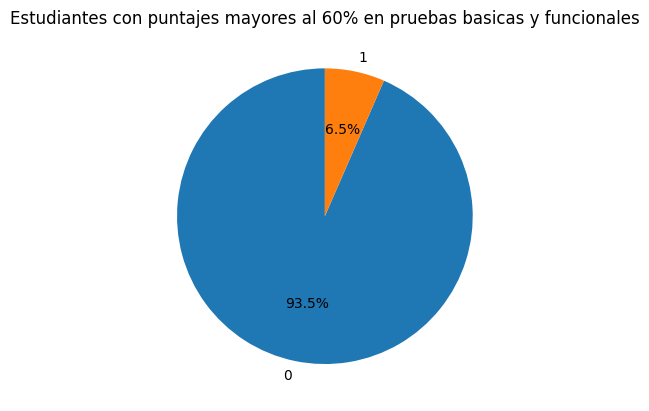

In [185]:
data = df_mod_2['y'].value_counts()/df_mod_2['y'].value_counts().sum()
plt.pie(data, labels = data.index, autopct='%1.1f%%', startangle = 90)
plt.title('Estudiantes con puntajes mayores al 60% en pruebas basicas y funcionales')

*Como se puede visualizar en la grafica de pie (pastel) solo un 6.5% de las personas que presentaron la prueba psicometrica obtuvieron un puntaje mayor a 60 en el total de respuestas. Lo que nos lleva a implementar para pruebas futuras refuerzos en dimensiones como lectura critica, razonamiento cuantitativo y competencias de funcion pública que fueron las que más bajo puntaje presentaron.*

In [186]:
df_mod_2_final= df_mod_2.drop(['TOTAL_PRUEBA_ByF'], axis=1)
df_mod_2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Num Correct                        107 non-null    int64   
 1   Total_CompetenciasCiudadanas       107 non-null    float64 
 2   Total_LecturaCritica               107 non-null    float64 
 3   Total_RazonamientoCuantitativo     107 non-null    float64 
 4   Total_CompetenciadeFuncionPublica  107 non-null    float64 
 5   Total_CompetenciasEspecificas      107 non-null    float64 
 6   y                                  107 non-null    category
dtypes: category(1), float64(5), int64(1)
memory usage: 5.4 KB


In [187]:
print(df_mod_2_final.columns)

Index(['Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica',
       'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica',
       'Total_CompetenciasEspecificas', 'y'],
      dtype='object')


In [188]:
df_mod_2_final= pd.get_dummies(df_mod_2_final, columns= ['Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica', 'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica', 'Total_CompetenciasEspecificas', 'y'])

Realizamos una descripcíon tácita del contenido del dataset denominado dfr_mod_2_final, el cual contiene las columnas 'Num Correct', 'Total_CompetenciasCiudadanas', 'Total_LecturaCritica', 'Total_RazonamientoCuantitativo', 'Total_CompetenciadeFuncionPublica', 'Total_CompetenciasEspecificas' del dataset original **comByF**, asi como el total de filas o registros, número de columnas tipo y codificacion estandar de los datos. Contiene tanto las variables como los resultados binarizados del componente de preguntas de las dimensiones basica y Funcional de la prueba psicométrica.

In [189]:
df_mod_2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Columns: 111 entries, Num Correct_20 to y_1
dtypes: uint8(111)
memory usage: 11.7 KB


In [190]:
print(df_mod_2_final.columns)

Index(['Num Correct_20', 'Num Correct_21', 'Num Correct_25', 'Num Correct_28',
       'Num Correct_31', 'Num Correct_32', 'Num Correct_36', 'Num Correct_37',
       'Num Correct_39', 'Num Correct_41',
       ...
       'Total_CompetenciasEspecificas_0.68',
       'Total_CompetenciasEspecificas_0.7',
       'Total_CompetenciasEspecificas_0.72',
       'Total_CompetenciasEspecificas_0.74',
       'Total_CompetenciasEspecificas_0.76',
       'Total_CompetenciasEspecificas_0.78',
       'Total_CompetenciasEspecificas_0.8',
       'Total_CompetenciasEspecificas_0.82', 'y_0', 'y_1'],
      dtype='object', length=111)


Este script realiza la tarea común de separar el conjunto de datos en variables predictoras *(características)* y variables de respuesta *(objetivos)* para su posterior uso en la construcción de modelos de machine learning, donde X contendría las características y y1 y y2 serían las variables objetivo que se intentarían predecir.







In [191]:
#Variables predictoras
X = df_mod_2_final.iloc[:,1:49]
#Variable respuesta
y1 = df_mod_2_final.y_0
y2 = df_mod_2_final.y_1

Este script realiza el proceso estándar de entrenar un modelo de *regresión logística* utilizando un conjunto de entrenamiento y luego evaluar su rendimiento en un conjunto de prueba mediante la generación de predicciones. Este enfoque es típico en el desarrollo y evaluación de modelos de machine learning supervisado.

In [192]:
#Entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3)
# Declaramos una instancia del modelo
lr = LogisticRegression()
#entrenar el modelo
lr.fit(X_train, y_train)
# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

> **Matriz de confusíon del modelo de aprendizaje**

Se realiza la evaluación y visualización de la matriz de confusión para un modelo de clasificación. Posteriormente se evalúa las predicciones de un modelo de clasificación mediante la construcción y visualización de una *matriz de confusión*, lo que proporciona información detallada sobre el rendimiento del modelo en términos de aciertos y errores en la clasificación.

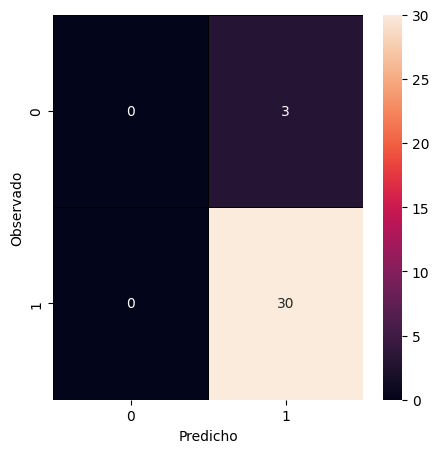

In [193]:
y_pred = lr.predict (X_test)
y_true = y_test
MC = confusion_matrix(y_true ,y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(MC, annot =True, linewidths = 0.5, linecolor ="black",fmt = ".0f", ax = ax)
plt.xlabel("Predicho")
plt.ylabel("Observado")
plt.show()

Se evalúa el rendimiento de un modelo de clasificación al calcular la matriz de confusión y visualizarla en forma de mapa de calor. La matriz de confusión proporciona información detallada sobre los aciertos y errores del modelo en términos de las categorías predichas y las categorías reales del conjunto de prueba. La visualización ayuda a comprender mejor el rendimiento del modelo en términos de falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos.

En el mapa de calor, estos valores se colocan en las diferentes celdas de la matriz de confusión. La disposición típica de la matriz de confusión es la siguiente:

                   TN  FP
                   FN  TP

En la matriz de confusión visualizada en el mapa de calor, los valores estipulados tiene los siguientes resultados:

Verdaderos Positivos **(True Positives - TP)**: Es el número de observaciones positivas que fueron correctamente clasificadas como positivas por el modelo. Da como resultado 31 registros TP.

Verdaderos Negativos **(True Negatives - TN)**: Es el número de observaciones negativas que fueron correctamente clasificadas como negativas por el modelo. Da como resultado 0 registros TN.

Falsos Positivos **(False Positives - FP)**: También se llama error de Tipo I. Es el número de observaciones negativas que fueron incorrectamente clasificadas como positivas por el modelo. Da como resultado 2 registros.

Falsos Negativos **(False Negatives - FN)**: También se llama error de Tipo II. Es el número de observaciones positivas que fueron incorrectamente clasificadas como negativas por el modelo. Da como resultado 0 registros FN.

Por lo tanto, cada celda representa una combinación específica de predicciones del modelo y etiquetas reales. La intensidad del color en cada celda del mapa de calor indica el valor asociado, y a menudo se usa una escala de colores para resaltar visualmente los diferentes valores. Por ejemplo, celdas con valores más altos pueden tener colores más oscuros.

> **Matriz de confusion con metodo pd.crosstab**

 Este script utiliza la función *pd.crosstab* para generar una matriz de confusión a partir de las etiquetas reales y las predicciones de un modelo de clasificación. La matriz de confusión proporciona una visión detallada del rendimiento del modelo al mostrar la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [194]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    y_pred,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,1
Real,
0,3
1,30


Verificando si existen clases desequilibradas, donde podrian tener pocas instancias para verificar advertencias y poder suprimirlas a fin de dar un resultado limpio en el entrenamiento de valores.

In [195]:
from sklearn.metrics import classification_report

# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.91      1.00      0.95        30

    accuracy                           0.91        33
   macro avg       0.95      0.50      0.48        33
weighted avg       0.92      0.91      0.87        33



Se proporciona una evaluación detallada del rendimiento de un modelo de clasificación en función de varias métricas, incluyendo precisión, recuperación, puntaje F1 y otras, para cada clase del problema. Este informe es útil para comprender cómo el modelo se desempeña en diferentes categorías y puede ayudar a identificar áreas en las que el modelo puede necesitar mejoras.

DSeguido explicaremos que detalla cada metrica:

1. **Precision (Precisión):** La precisión se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos positivos. Es una medida de la exactitud de las predicciones positivas del modelo. la precisión se proporciona para cada clase por separado. Una alta precisión indica que el modelo tiene una baja tasa de falsos positivos para esa clase. Vemos que casi todas los valores tienden a 1.0 excepto, *La fórmula de precisión es: precision = TP / (TP + FP).*

2. **Recall (Recuperación o Sensibilidad):** a recuperación se calcula como el número de verdaderos positivos dividido por la suma de verdaderos positivos y falsos negativos. Es una medida de la capacidad del modelo para capturar todos los casos positivos. El valor de recall en los valores cero (0) da como resultado 0 cero(cero) y para los valores 1 es igual a uno(1). *La fórmula de recuperación es: recall = TP / (TP + FN)*

3. **F1-Score:** El puntaje F1 es la media armónica de precisión y recuperación. Proporciona un equilibrio entre ambas métricas y es especialmente útil cuando hay un desequilibrio en la distribución de clases. Para los valores en 0 dan como resultado cero(0) y para valores en 1 da como resultado 1 (uno). La fórmula del puntaje F1 es: *f1-score = 2 * (precision * recall) / (precision + recall)*.

4. **Support:** Support indica la cantidad real de observaciones de cada clase en el conjunto de prueba. Es el número total de verdaderos positivos más falsos negativos para esa clase.

Al examinar estas métricas para todas las clases, puedes obtener una comprensión completa del rendimiento global del modelo y detectar posibles desafíos o áreas de mejora. Ya estas descripciones predictivas se han generado en todo el transcurso de contextualizacion de las gráficas.

Implementacion de metricas de medicion de los datos de entrenamietno como precisioon, recall, f1-score y support para ver el grado de precision del entrenamiento del modelo.

> **Grafica de curva AUC_ROC del modelo de regresion logística**

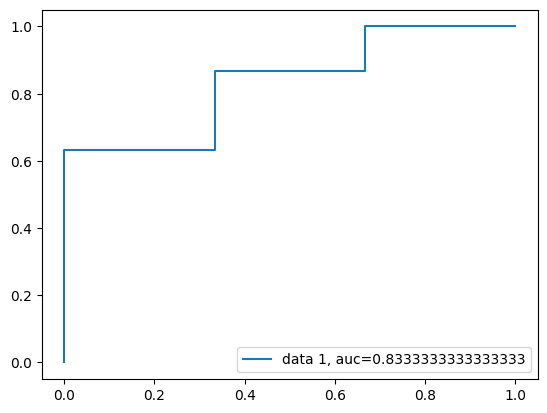

In [196]:
from sklearn import metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

> **Contextualizacíon de la gráfica**

La curva ROC-AUC evalúa y visualiza la calidad de las predicciones de un modelo de regresión logística con un método ML supervisado, es importante observar que representa la relación entre la tasa de *verdaderos positivos* y la tasa de *falsos positivos* para diferentes umbrales de clasificación. Un AUC cercano a 1 indica un buen rendimiento del modelo, ya que significa que tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos en comparación con un clasificador aleatorio. Por tanto se puede deducir que la implementacion del modelo ML supervisado utilizando la tecnica de regresion logistica a dado una excelente prediccion en el entrenamiento de los datos.

> **Explicacion algorítmica del script para graficar la curva AUC_ROC**

El script Python proporcionado se utiliza para generar una curva de característica operativa del receptor (ROC) y calcular el área bajo la curva (AUC) para un modelo de clasificación binaria.

1. Predecir probabilidades:

lr.predict_proba(X_test)devuelve las probabilidades previstas de la clase positiva para el conjunto de prueba.

2. Calcular la curva ROC:

metrics.roc_curve(y_test, y_pred_proba)calcula la curva de característica operativa del receptor (ROC) variando el umbral de decisión.
Devuelve la tasa de falsos positivos (fpr), la tasa de verdaderos positivos (tpr) y los umbrales.

3. Calcular el AUC:

metrics.roc_auc_score(y_test, y_pred_proba)calcula el área bajo la curva (AUC) utilizando la curva ROC.

4. Trazar la curva ROC:

plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))traza la curva ROC, con el valor AUC incluido en la leyenda.
plt.legend(loc=4)coloca la leyenda en la esquina inferior derecha.
plt.show()muestra la trama.

Es una forma común de evaluar visualmente el rendimiento de un modelo de clasificación binaria trazando su curva ROC y calculando el AUC. El AUC proporciona un valor escalar único que resume la capacidad del modelo para discriminar entre las clases positivas y negativas.



